In [104]:
import pandas as pd
import os

# Define the directory containing the education data files
directory = '/Users/admin/Desktop/RawEducationDataByYear'

# Create an empty list to store the DataFrames
data_frames = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Extract the year from the filename
        year = filename.split('.')[0]  # Extracts '2011' from '2011.csv'

        # Load the data
        file_path = os.path.join(directory, filename)
        education_data = pd.read_csv(file_path)

        # Add the Year column
        education_data['Year'] = int(year)
        
        # Print debug information
        print(f"Processed file: {filename}")
        print(education_data.head())

        # Append the DataFrame to the list
        data_frames.append(education_data)

# Ensure the list of DataFrames is not empty before concatenation
if data_frames:
    # Concatenate all DataFrames in the list
    combined_education_data = pd.concat(data_frames, ignore_index=True)
    
    # Save the combined data (if needed)
    combined_education_data.to_csv('combined_education_data.csv', index=False)
    
    print("Combined data with Year column saved successfully.")
    
    # Display the columns to verify
    columns_list = combined_education_data.columns
    print("Columns in the combined education data:", columns_list)
    
    # Print the unique years to verify
    unique_years = combined_education_data['Year'].unique()
    print("Unique years in the data:", unique_years)
    
    # Print the shape of the combined DataFrame
    print("Shape of the combined DataFrame:", combined_education_data.shape)
else:
    print("No data files were processed.")

Processed file: 2020.csv
           GEO_ID                  NAME  \
0       Geography  Geographic Area Name   
1  8600000US90001           ZCTA5 90001   
2  8600000US90002           ZCTA5 90002   
3  8600000US90003           ZCTA5 90003   
4  8600000US90004           ZCTA5 90004   

                                      S1501_C01_001E  \
0  Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...   
1                                               6586   
2                                               6570   
3                                               7513   
4                                               5739   

                                      S1501_C01_001M  \
0  Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...   
1                                                585   
2                                                622   
3                                                699   
4                                                711   

                                      S150

In [107]:
# Convert the columns to a list and print
columns_list = list(combined_education_data.columns)
print("Columns in the DataFrame:")
for column in columns_list:
    print(column)

Columns in the DataFrame:
GEO_ID
NAME
S1501_C01_001E
S1501_C01_001M
S1501_C01_002E
S1501_C01_002M
S1501_C01_003E
S1501_C01_003M
S1501_C01_004E
S1501_C01_004M
S1501_C01_005E
S1501_C01_005M
S1501_C01_006E
S1501_C01_006M
S1501_C01_007E
S1501_C01_007M
S1501_C01_008E
S1501_C01_008M
S1501_C01_009E
S1501_C01_009M
S1501_C01_010E
S1501_C01_010M
S1501_C01_011E
S1501_C01_011M
S1501_C01_012E
S1501_C01_012M
S1501_C01_013E
S1501_C01_013M
S1501_C01_014E
S1501_C01_014M
S1501_C01_015E
S1501_C01_015M
S1501_C01_016E
S1501_C01_016M
S1501_C01_017E
S1501_C01_017M
S1501_C01_018E
S1501_C01_018M
S1501_C01_019E
S1501_C01_019M
S1501_C01_020E
S1501_C01_020M
S1501_C01_021E
S1501_C01_021M
S1501_C01_022E
S1501_C01_022M
S1501_C01_023E
S1501_C01_023M
S1501_C01_024E
S1501_C01_024M
S1501_C01_025E
S1501_C01_025M
S1501_C01_026E
S1501_C01_026M
S1501_C01_027E
S1501_C01_027M
S1501_C01_028E
S1501_C01_028M
S1501_C01_029E
S1501_C01_029M
S1501_C01_030E
S1501_C01_030M
S1501_C01_031E
S1501_C01_031M
S1501_C01_032E
S1501_C01_032M
S1

In [108]:
# Check the unique values in the 'Year' column to ensure all years are present
print("Unique years in the data:", combined_education_data['Year'].unique())

# Summarize the data to check for the 'Year' column and other statistics
print(combined_education_data.describe())

# Optionally, check the distribution of the data by year
print(combined_education_data['Year'].value_counts())

Unique years in the data: [2020 2021 2022 2019 2018 2015 2014 2016 2017 2013 2012 2011]
       Unnamed: 770         Year  Unnamed: 230
count           0.0  2005.000000           0.0
mean            NaN  2016.557107           NaN
std             NaN     3.499979           NaN
min             NaN  2011.000000           NaN
25%             NaN  2013.000000           NaN
50%             NaN  2017.000000           NaN
75%             NaN  2020.000000           NaN
max             NaN  2022.000000           NaN
2021    174
2022    174
2020    172
2019    172
2018    172
2014    172
2016    172
2017    172
2013    172
2012    172
2011    172
2015    109
Name: Year, dtype: int64


In [109]:
# Creating DataFrame
df = combined_education_data

# Deleting the second row (index 1)
df = df.drop(0).reset_index(drop=True)

# Renaming 'NAME' to 'ZipCode' and removing 'ZCTA5 ' prefix
df['ZipCode'] = df['NAME'].apply(lambda x: x.replace('ZCTA5 ', ''))

# Dropping the original 'NAME' column
df = df.drop(columns=['NAME'])

# Display the updated DataFrame
print(df.head())

# Save the processed data if needed
df.to_csv('/Users/admin/Desktop/combined_education_data_processed.csv', index=False)

           GEO_ID S1501_C01_001E S1501_C01_001M S1501_C01_002E S1501_C01_002M  \
0  8600000US90001           6586            585           1338            289   
1  8600000US90002           6570            622           1358            260   
2  8600000US90003           7513            699           1363            281   
3  8600000US90004           5739            711            685            257   
4  8600000US90005           3265            384            356            104   

  S1501_C01_003E S1501_C01_003M S1501_C01_004E S1501_C01_004M S1501_C01_005E  \
0           2282            344           2763            393            203   
1           2419            411           2584            328            209   
2           2761            358           3119            508            270   
3           1649            314           2128            303           1277   
4           1056            233           1265            254            588   

   ... S1501_C06_062E S1501_C06_

In [110]:
# Load the processed education_data
education_data = pd.read_csv('/Users/admin/Desktop/combined_education_data_processed.csv')

# Define the column mapping
column_mapping = {
    'S1501_C01_001E': 'Pop 18-24',
    'S1501_C01_002E': 'Pop 18-24 < HS',
    'S1501_C01_003E': 'Pop 18-24 HS',
    'S1501_C01_004E': 'Pop 18-24 Some College',
    'S1501_C01_005E': 'Pop 18-24 Bachelors+',
    'S1501_C01_006E': 'Pop 25+',
    'S1501_C01_007E': 'Pop 25+ < 9th Grade',
    'S1501_C01_008E': 'Pop 25+ No Diploma',
    'S1501_C01_009E': 'Pop 25+ HS',
    'S1501_C01_010E': 'Pop 25+ Some College',
    'S1501_C01_011E': 'Pop 25+ Assoc Degree',
    'S1501_C01_012E': 'Pop 25+ Bachelors',
    'S1501_C01_013E': 'Pop 25+ Grad Degree',
    'S1501_C01_014E': 'Pop 25+ HS+',
    'S1501_C01_015E': 'Pop 25+ Bachelors+',
    'S1501_C01_016E': 'Pop 25-34',
    'S1501_C01_017E': 'Pop 25-34 HS+',
    'S1501_C01_018E': 'Pop 25-34 Bachelors+',
    'S1501_C01_019E': 'Pop 35-44',
    'S1501_C01_020E': 'Pop 35-44 HS+',
    'S1501_C01_021E': 'Pop 35-44 Bachelors+',
    'S1501_C01_022E': 'Pop 45-64',
    'S1501_C01_023E': 'Pop 45-64 HS+',
    'S1501_C01_024E': 'Pop 45-64 Bachelors+',
    'S1501_C01_025E': 'Pop 65+',
    'S1501_C01_026E': 'Pop 65+ HS+',
    'S1501_C01_027E': 'Pop 65+ Bachelors+'
}

# Add 'Year' and 'ZipCode' to the list of columns to keep
columns_to_keep = ['Year', 'ZipCode'] + list(column_mapping.keys())

# Filter the combined data to include only the specified columns
filtered_data = education_data[columns_to_keep]

# Rename the columns according to the mapping
filtered_data = filtered_data.rename(columns=column_mapping)

# Ensure 'ZipCode' contains only numeric values and remove any non-numeric entries
filtered_data = filtered_data[filtered_data['ZipCode'].str.isnumeric()]

# Clean ZIP codes in education data by converting to string
filtered_data['ZipCode'] = filtered_data['ZipCode'].astype(str)

# Display the first few rows of the filtered and renamed data to verify
print(filtered_data.head())

# Save the filtered and renamed DataFrame to a new CSV file
filtered_data.to_csv('/Users/admin/Desktop/filtered_education_data.csv', index=False)

# Group by 'Year' and count entries for each year to see if there's data beyond 2010
year_counts = filtered_data.groupby('Year').size()
print(year_counts)

   Year ZipCode Pop 18-24 Pop 18-24 < HS Pop 18-24 HS Pop 18-24 Some College  \
0  2020   90001      6586           1338         2282                   2763   
1  2020   90002      6570           1358         2419                   2584   
2  2020   90003      7513           1363         2761                   3119   
3  2020   90004      5739            685         1649                   2128   
4  2020   90005      3265            356         1056                   1265   

  Pop 18-24 Bachelors+ Pop 25+ Pop 25+ < 9th Grade Pop 25+ No Diploma  ...  \
0                  203   34325               10852               6162  ...   
1                  209   29918                8613               5918  ...   
2                  270   42473               12377               8337  ...   
3                 1277   43743                5876               4148  ...   
4                  588   28502                5290               2746  ...   

  Pop 25-34 Bachelors+ Pop 35-44 Pop 35-44 HS+ Pop

In [111]:
# Print the column headers
print(filtered_data.columns)

Index(['Year', 'ZipCode', 'Pop 18-24', 'Pop 18-24 < HS', 'Pop 18-24 HS',
       'Pop 18-24 Some College', 'Pop 18-24 Bachelors+', 'Pop 25+',
       'Pop 25+ < 9th Grade', 'Pop 25+ No Diploma', 'Pop 25+ HS',
       'Pop 25+ Some College', 'Pop 25+ Assoc Degree', 'Pop 25+ Bachelors',
       'Pop 25+ Grad Degree', 'Pop 25+ HS+', 'Pop 25+ Bachelors+', 'Pop 25-34',
       'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 'Pop 35-44', 'Pop 35-44 HS+',
       'Pop 35-44 Bachelors+', 'Pop 45-64', 'Pop 45-64 HS+',
       'Pop 45-64 Bachelors+', 'Pop 65+', 'Pop 65+ HS+', 'Pop 65+ Bachelors+'],
      dtype='object')


In [112]:
# Verify the unique years in the education data
unique_years_education = filtered_data['Year'].unique()
print("Unique Years in education data:", unique_years_education)

Unique Years in education data: [2020 2021 2022 2019 2018 2015 2014 2016 2017 2013 2012 2011]


##Business Data Cleaning and Processing

In [17]:
# Load your business data (update the file path as needed)
business_data = pd.read_csv('Active_Businesses.csv')

# Display the columns to verify their names
print(business_data.columns)

Index(['LOCATION ACCOUNT #', 'BUSINESS NAME', 'DBA NAME', 'STREET ADDRESS',
       'CITY', 'ZIP CODE', 'LOCATION DESCRIPTION', 'MAILING ADDRESS',
       'MAILING CITY', 'MAILING ZIP CODE', 'NAICS',
       'PRIMARY NAICS DESCRIPTION', 'COUNCIL DISTRICT', 'LOCATION START DATE',
       'LOCATION END DATE', 'LOCATION'],
      dtype='object')


In [37]:
business_data.describe()

,NAICS,COUNCIL DISTRICT,LOCATION END DATE
count,523121.000000,587032.000000,0.0
mean,548626.596894,6.204725,NaN
std,165181.842655,4.986458,NaN
min,111110.000000,0.000000,NaN
25%,452000.000000,2.000000,NaN
50%,541213.000000,5.000000,NaN
75%,624410.000000,11.000000,NaN
max,999999.000000,15.000000,NaN


In [42]:
# Display the first few rows of the dataset
print(business_data.head())

# Display the columns to ensure 'NAICS' is present
print(business_data.columns)

# Ensure the 'NAICS' column is treated as a string
business_data['NAICS'] = business_data['NAICS'].astype(str)

# Remove the ".0" suffix from the 'NAICS' column
business_data['NAICS'] = business_data['NAICS'].str.replace('.0', '', regex=False)

# Display unique NAICS codes and sort them
unique_naics = business_data['NAICS'].unique()
sorted_naics = sorted(unique_naics, key=lambda x: (float(x) if x.replace('.', '', 1).isdigit() else float('inf')))
print(f"Sorted unique NAICS codes in the dataset: {sorted_naics}")

  LOCATION ACCOUNT #             BUSINESS NAME           DBA NAME  \
0  0002470296-0003-7                KOMODO LLC             KOMODO   
1  0002829017-0001-5      RICHARD JOHN SHERMAN                NaN   
2  0003260354-0001-2  SOCAL DEMOLITION COMPANY                NaN   
3  0003317944-0001-2            LDE CONSULTING                NaN   
4  0002484826-0001-0               RON FORREST  ALL-RIGHT ROOFING   

          STREET ADDRESS             CITY    ZIP CODE  \
0        235 MAIN STREET           VENICE  90291-5221   
1   2010 LA BREA TERRACE      LOS ANGELES  90046-2314   
2      319 W 18TH STREET    NATIONAL CITY  91950-5525   
3       25692 MOORE LANE  STEVENSON RANCH  91381-1404   
4  1652 E LA DENEY DRIVE          ONTARIO  91764-2222   

       LOCATION DESCRIPTION        MAILING ADDRESS   MAILING CITY  \
0       235 MAIN 90291-5221                    NaN            NaN   
1   2010 LA BREA 90046-2314                    NaN            NaN   
2            319 18TH 91950      31

In [113]:
# Define the columns to keep
columns_to_keep = [
    'BUSINESS NAME', 
    'ZIP CODE', 
    'NAICS', 
    'LOCATION START DATE', 
    'LOCATION END DATE', 
    'LOCATION', 
    'PRIMARY NAICS DESCRIPTION'
]

# Check if the specified columns exist in the DataFrame
for col in columns_to_keep:
    if col not in business_data.columns:
        print(f"Column '{col}' not found in the DataFrame")

In [114]:
# Filter the DataFrame to include only the specified columns
filtered_business_data = business_data.loc[:, columns_to_keep]

# Display the filtered data to verify
print(filtered_business_data.head())

              BUSINESS NAME    ZIP CODE NAICS LOCATION START DATE  \
0                KOMODO LLC  90291-5221   nan          12/16/2013   
1      RICHARD JOHN SHERMAN  90046-2314   nan          04/19/2014   
2  SOCAL DEMOLITION COMPANY  91950-5525   nan          04/01/2021   
3            LDE CONSULTING  91381-1404   nan          06/01/2022   
4               RON FORREST  91764-2222   nan          02/10/2010   

   LOCATION END DATE              LOCATION PRIMARY NAICS DESCRIPTION  
0                NaN  (33.9968, -118.4784)                       NaN  
1                NaN                   NaN                       NaN  
2                NaN  (32.6665, -117.1073)                       NaN  
3                NaN                   NaN                       NaN  
4                NaN   (34.084, -117.6183)                       NaN  


In [115]:
# Verify column names
print(filtered_business_data.columns)

Index(['BUSINESS NAME', 'ZIP CODE', 'NAICS', 'LOCATION START DATE',
       'LOCATION END DATE', 'LOCATION', 'PRIMARY NAICS DESCRIPTION'],
      dtype='object')


In [117]:
# Ensure correct column name for ZIP code
zip_code_column = 'ZIP CODE'

# Delete the 5-digit ZIP code suffix and relabel the column to 'ZipCode'
filtered_business_data['ZipCode'] = filtered_business_data[zip_code_column].astype(str).str[:5]

# Transform 'LOCATION START DATE' to retain only the year
filtered_business_data['Year'] = pd.to_datetime(filtered_business_data['LOCATION START DATE'], errors='coerce').dt.year

# Ensure 'Year' column is of integer type
filtered_business_data['Year'] = filtered_business_data['Year'].astype('Int64')

# Display the cleaned and transformed data to verify
print(filtered_business_data[['ZipCode', 'Year']].head())

# Save the filtered data to a CSV file
filtered_business_data.to_csv('filtered_business_data.csv', index=False)

print("Filtered business data saved successfully.")

  ZipCode  Year
0   90291  2013
1   90046  2014
2   91950  2021
3   91381  2022
4   91764  2010
Filtered business data saved successfully.


In [118]:
import pandas as pd

# Strip any whitespace from the column names
filtered_business_data.columns = filtered_business_data.columns.str.strip()

# Verify column names again after stripping
print("Columns in the DataFrame after stripping whitespace:", filtered_business_data.columns)

# Use the correct column name for ZIP code if it was renamed
zip_code_column = 'ZIP CODE'  # This should be the correct column name after stripping

# Delete the 5-digit ZIP code suffix and relabel the column to 'ZipCode'
filtered_business_data['ZipCode'] = filtered_business_data[zip_code_column].astype(str).str[:5]

# Transform 'LOCATION START DATE' to retain only the year
filtered_business_data['Year'] = pd.to_datetime(filtered_business_data['LOCATION START DATE'], errors='coerce').dt.year

# Ensure 'Year' column is of integer type
filtered_business_data['Year'] = filtered_business_data['Year'].astype('Int64')

# Display the cleaned and transformed data to verify
print(filtered_business_data[['ZipCode', 'Year']].head())

# Save the filtered data to a CSV file
filtered_business_data.to_csv('filtered_business_data.csv', index=False)

print("Filtered business data saved successfully.")

Columns in the DataFrame after stripping whitespace: Index(['BUSINESS NAME', 'ZIP CODE', 'NAICS', 'LOCATION START DATE',
       'LOCATION END DATE', 'LOCATION', 'PRIMARY NAICS DESCRIPTION', 'ZipCode',
       'Year'],
      dtype='object')
  ZipCode  Year
0   90291  2013
1   90046  2014
2   91950  2021
3   91381  2022
4   91764  2010
Filtered business data saved successfully.


In [121]:
import pandas as pd

# Load your filtered business data
filtered_business_data = pd.read_csv('filtered_business_data.csv')

# Define tech-related 4-digit NAICS code prefixes
tech_naics_prefixes = [
    '3341', '3342', '3343', '3344', '3345', '3346', '3359', 
    '5112', '5182', '5191', '5415', '5416', '5417'
]

# Define specific tech-related 6-digit NAICS codes
specific_tech_naics_codes = [
    '334512', '334516', '336413', '425110', '425120', 
    '541199', '541990', '811210'
]

# Function to check if a NAICS code is relevant
def is_relevant_naics(code):
    code = str(code).strip()  # Ensure code is a string and strip any extra whitespace
    return any(code.startswith(prefix) for prefix in tech_naics_prefixes) or code in specific_tech_naics_codes

# Apply the function to filter the DataFrame
filtered_business_data['NAICS'] = filtered_business_data['NAICS'].astype(str)
relevant_naics = filtered_business_data[filtered_business_data['NAICS'].apply(is_relevant_naics)].copy()

# Delete the 5-digit ZIP code suffix and relabel the column to 'ZipCode'
relevant_naics.loc[:, 'ZipCode'] = relevant_naics['ZIP CODE'].astype(str).str[:5]

# Transform 'LOCATION START DATE' to retain only the year
relevant_naics.loc[:, 'Year'] = pd.to_datetime(relevant_naics['LOCATION START DATE'], errors='coerce').dt.year

# Ensure 'Year' column is of integer type
relevant_naics.loc[:, 'Year'] = relevant_naics['Year'].astype('Int64')

# Display data types before saving
print("Data types before saving:")
print(relevant_naics.dtypes)

# Save the filtered data to a new CSV file
relevant_naics.to_csv('filtered_business_data_relevant_naics.csv', index=False)

print("Filtered business data with relevant NAICS codes saved successfully.")


Data types before saving:
BUSINESS NAME                 object
ZIP CODE                      object
NAICS                         object
LOCATION START DATE           object
LOCATION END DATE            float64
LOCATION                      object
PRIMARY NAICS DESCRIPTION     object
ZipCode                       object
Year                           Int64
dtype: object
Filtered business data with relevant NAICS codes saved successfully.


In [122]:
# Load the filtered business data with relevant NAICS codes
filtered_relevant_business_data = pd.read_csv('filtered_business_data_relevant_naics.csv')

# Verify the filtered data
print("Filtered relevant business data:")
print(filtered_relevant_business_data.head())
print("Summary of filtered relevant business data:")
print(filtered_relevant_business_data.info())

# Check for the number of rows and columns in the filtered data
print("Shape of the filtered relevant business data:", filtered_relevant_business_data.shape)

Filtered relevant business data:
          BUSINESS NAME    ZIP CODE     NAICS LOCATION START DATE  \
0          COREY L BASS  91040-1237  541600.0          01/15/2020   
1          TONY FEGHALI  91307-3516  541510.0          01/01/2023   
2  S & K MANAGEMENT INC  91335-4102  541600.0          01/01/2000   
3    INTENSE CODING LLC  90065-1929  541600.0          07/18/2014   
4     CAA EVOLUTION LLC  90067-4700  541600.0          04/04/2008   

   LOCATION END DATE              LOCATION  \
0                NaN                   NaN   
1                NaN    (34.1867, 34.1867)   
2                NaN   (34.194, -118.5385)   
3                NaN  (34.1023, -118.2333)   
4                NaN  (34.0586, -118.4158)   

                           PRIMARY NAICS DESCRIPTION ZipCode    Year  
0  Management, scientific, & technical consulting...   91040  2020.0  
1         Computer systems design & related services   91307  2023.0  
2  Management, scientific, & technical consulting...   91335  

In [128]:
# Load your filtered business data
relevant_naics = pd.read_csv('filtered_business_data_relevant_naics.csv')

# Remove the '.0' by converting the columns to integers
relevant_naics['NAICS'] = relevant_naics['NAICS'].astype(int)

# Convert 'Year' column to integers, handle NaN values by setting them to None
relevant_naics['Year'] = relevant_naics['Year'].fillna(0).astype(int)
relevant_naics['Year'] = relevant_naics['Year'].replace(0, None)

# Display the cleaned data to verify
print("Cleaned relevant business data:")
print(relevant_naics.head())

# Display data types after conversion
print("Data types after conversion:")
print(relevant_naics.dtypes)

# Save the cleaned data to a new CSV file
relevant_naics.to_csv('cleaned_business_data_relevant_naics.csv', index=False)

print("Cleaned business data with relevant NAICS codes saved successfully.")

Cleaned relevant business data:
          BUSINESS NAME    ZIP CODE   NAICS LOCATION START DATE  \
0          COREY L BASS  91040-1237  541600          01/15/2020   
1          TONY FEGHALI  91307-3516  541510          01/01/2023   
2  S & K MANAGEMENT INC  91335-4102  541600          01/01/2000   
3    INTENSE CODING LLC  90065-1929  541600          07/18/2014   
4     CAA EVOLUTION LLC  90067-4700  541600          04/04/2008   

   LOCATION END DATE              LOCATION  \
0                NaN                   NaN   
1                NaN    (34.1867, 34.1867)   
2                NaN   (34.194, -118.5385)   
3                NaN  (34.1023, -118.2333)   
4                NaN  (34.0586, -118.4158)   

                           PRIMARY NAICS DESCRIPTION ZipCode  Year  
0  Management, scientific, & technical consulting...   91040  2020  
1         Computer systems design & related services   91307  2023  
2  Management, scientific, & technical consulting...   91335  2000  
3  Managemen

In [183]:
import pandas as pd

# Load your original education data
education_data = pd.read_csv('/Users/admin/Desktop/filtered_education_data.csv')

# Load your original business data
business_data = pd.read_csv('/Users/admin/Desktop/cleaned_business_data_relevant_naics.csv')

# Convert relevant columns in the education data to appropriate types
education_columns = [
    'Pop 18-24 < HS', 'Pop 18-24 HS', 'Pop 18-24 Some College', 'Pop 18-24 Bachelors+',
    'Pop 25+ < 9th Grade', 'Pop 25+ No Diploma', 'Pop 25+ HS', 'Pop 25+ Some College',
    'Pop 25+ Assoc Degree', 'Pop 25+ Bachelors', 'Pop 25+ Grad Degree', 'Pop 25+ HS+',
    'Pop 25+ Bachelors+', 'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 'Pop 35-44 HS+',
    'Pop 35-44 Bachelors+', 'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 'Pop 65+ HS+',
    'Pop 65+ Bachelors+'
]

# Convert the relevant education columns to numeric, coercing errors
education_data[education_columns] = education_data[education_columns].apply(pd.to_numeric, errors='coerce')

# Fill NaNs in educational data columns with 0
education_data[education_columns] = education_data[education_columns].fillna(0)

# Ensure Year columns are integers
education_data['Year'] = education_data['Year'].astype(int)

# Handle non-finite values in the 'Year' column of business data
business_data['Year'] = pd.to_numeric(business_data['Year'], errors='coerce').fillna(0).astype(int)

# Convert ZipCode columns to string type
education_data['ZipCode'] = education_data['ZipCode'].astype(str)
business_data['ZipCode'] = business_data['ZipCode'].astype(str)

# Convert NAICS codes to string to remove '.0'
business_data['NAICS'] = business_data['NAICS'].astype(str).str.replace('\.0$', '', regex=True)

# Display dtypes to verify
print("Business DataFrame dtypes:")
print(business_data.dtypes)
print("Education DataFrame dtypes:")
print(education_data.dtypes)


Business DataFrame dtypes:
BUSINESS NAME                 object
ZIP CODE                      object
NAICS                         object
LOCATION START DATE           object
LOCATION END DATE            float64
LOCATION                      object
PRIMARY NAICS DESCRIPTION     object
ZipCode                       object
Year                           int64
dtype: object
Education DataFrame dtypes:
Year                        int64
ZipCode                    object
Pop 18-24                   int64
Pop 18-24 < HS            float64
Pop 18-24 HS              float64
Pop 18-24 Some College    float64
Pop 18-24 Bachelors+      float64
Pop 25+                     int64
Pop 25+ < 9th Grade       float64
Pop 25+ No Diploma        float64
Pop 25+ HS                float64
Pop 25+ Some College      float64
Pop 25+ Assoc Degree      float64
Pop 25+ Bachelors         float64
Pop 25+ Grad Degree       float64
Pop 25+ HS+               float64
Pop 25+ Bachelors+        float64
Pop 25-34           

In [169]:
# Ensure that the 'Year' column is of type int in both DataFrames
business_data['Year'] = pd.to_numeric(business_data['Year'], errors='coerce')
education_data['Year'] = pd.to_numeric(education_data['Year'], errors='coerce')

# Drop rows with NaN 'Year' values
business_data = business_data.dropna(subset=['Year'])
education_data = education_data.dropna(subset=['Year'])

# Convert 'Year' column to integers
business_data['Year'] = business_data['Year'].astype(int)
education_data['Year'] = education_data['Year'].astype(int)

# Ensure that the 'ZipCode' column is of type string in both DataFrames
education_data['ZipCode'] = education_data['ZipCode'].astype(str)
business_data['ZipCode'] = business_data['ZipCode'].astype(str)

# Check data types
print("Business DataFrame dtypes:")
print(business_data.dtypes)
print("Education DataFrame dtypes:")
print(education_data.dtypes)

Business DataFrame dtypes:
BUSINESS NAME                 object
ZIP CODE                      object
NAICS                          int64
LOCATION START DATE           object
LOCATION END DATE            float64
LOCATION                      object
PRIMARY NAICS DESCRIPTION     object
ZipCode                       object
Year                           int64
dtype: object
Education DataFrame dtypes:
Year                       int64
ZipCode                   object
Pop 18-24                  int64
Pop 18-24 < HS            object
Pop 18-24 HS              object
Pop 18-24 Some College    object
Pop 18-24 Bachelors+      object
Pop 25+                    int64
Pop 25+ < 9th Grade       object
Pop 25+ No Diploma        object
Pop 25+ HS                object
Pop 25+ Some College      object
Pop 25+ Assoc Degree      object
Pop 25+ Bachelors         object
Pop 25+ Grad Degree       object
Pop 25+ HS+               object
Pop 25+ Bachelors+        object
Pop 25-34                  int64
Pop 

In [241]:
# Convert relevant columns in the education data to appropriate types
education_columns = [
    'Pop 18-24 < HS', 'Pop 18-24 HS', 'Pop 18-24 Some College', 'Pop 18-24 Bachelors+',
    'Pop 25+ < 9th Grade', 'Pop 25+ No Diploma', 'Pop 25+ HS', 'Pop 25+ Some College',
    'Pop 25+ Assoc Degree', 'Pop 25+ Bachelors', 'Pop 25+ Grad Degree', 'Pop 25+ HS+',
    'Pop 25+ Bachelors+', 'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 'Pop 35-44 HS+',
    'Pop 35-44 Bachelors+', 'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 'Pop 65+ HS+',
    'Pop 65+ Bachelors+'
]

# Convert the relevant education columns to numeric, coercing errors
education_data[education_columns] = education_data[education_columns].apply(pd.to_numeric, errors='coerce')

# Fill NaNs in educational data columns with 0
education_data[education_columns] = education_data[education_columns].fillna(0)

# Ensure Year columns are integers
education_data['Year'] = education_data['Year'].astype(int)
business_data['Year'] = pd.to_numeric(business_data['Year'], errors='coerce').fillna(0).astype(int)

# Convert ZipCode columns to string type
education_data['ZipCode'] = education_data['ZipCode'].astype(str)
business_data['ZipCode'] = business_data['ZipCode'].astype(str)

# Convert NAICS codes to string to remove '.0'
business_data['NAICS'] = business_data['NAICS'].astype(str).str.replace('\.0$', '', regex=True)

# Display dtypes to verify
print("Business DataFrame dtypes:")
print(business_data.dtypes)
print("Education DataFrame dtypes:")
print(education_data.dtypes)

Business DataFrame dtypes:
BUSINESS NAME                 object
ZIP CODE                      object
NAICS                         object
LOCATION START DATE           object
LOCATION END DATE            float64
LOCATION                      object
PRIMARY NAICS DESCRIPTION     object
ZipCode                       object
Year                           int64
dtype: object
Education DataFrame dtypes:
Year                        int64
ZipCode                    object
Pop 18-24                   int64
Pop 18-24 < HS            float64
Pop 18-24 HS              float64
Pop 18-24 Some College    float64
Pop 18-24 Bachelors+      float64
Pop 25+                     int64
Pop 25+ < 9th Grade       float64
Pop 25+ No Diploma        float64
Pop 25+ HS                float64
Pop 25+ Some College      float64
Pop 25+ Assoc Degree      float64
Pop 25+ Bachelors         float64
Pop 25+ Grad Degree       float64
Pop 25+ HS+               float64
Pop 25+ Bachelors+        float64
Pop 25-34           

In [242]:
# Aggregate the education data by Year and ZipCode
aggregated_education_data = education_data.groupby(['Year', 'ZipCode'])[education_columns].mean().reset_index()

# Display the first few rows of the aggregated education data
print("Aggregated Education DataFrame:")
print(aggregated_education_data.head())

Aggregated Education DataFrame:
   Year ZipCode  Pop 18-24 < HS  Pop 18-24 HS  Pop 18-24 Some College  \
0  2011   90001            33.1          33.1                    31.1   
1  2011   90002            32.4          30.9                    34.5   
2  2011   90003            37.6          26.0                    34.9   
3  2011   90004            23.8          26.9                    36.2   
4  2011   90005            32.6          28.8                    32.6   

   Pop 18-24 Bachelors+  Pop 25+ < 9th Grade  Pop 25+ No Diploma  Pop 25+ HS  \
0                   2.8                 40.7                20.2        21.6   
1                   2.2                 32.3                17.1        26.1   
2                   1.5                 32.1                21.4        23.9   
3                  13.1                 17.8                10.8        19.6   
4                   6.1                 21.6                10.7        23.8   

   Pop 25+ Some College  ...  Pop 25+ HS+  Pop 2

In [291]:
# Perform the merge
merged_data = pd.merge(business_data, aggregated_education_data, on=['Year', 'ZipCode'], how='outer')

# Display the first few rows of the merged data
print("Merged DataFrame with aggregated education data (full outer join):")
print(merged_data.head())

# Display the shape of the merged DataFrame
print("Shape of the merged DataFrame:", merged_data.shape)

Merged DataFrame with aggregated education data (full outer join):
                                       BUSINESS NAME    ZIP CODE   NAICS  \
0                                       COREY L BASS  91040-1237  541600   
1                                    BUILDOPTIMA INC  91040-1429  541510   
2                                       CABIA HR LLC  91040-2026  541600   
3  MS CONSTRUCTION PLANNING DESIGNS LIMITED LIABI...  91040-1437  541510   
4                                       TONY FEGHALI  91307-3516  541510   

  LOCATION START DATE  LOCATION END DATE              LOCATION  \
0          01/15/2020                NaN                   NaN   
1          05/20/2020                NaN   (34.247, -118.3576)   
2          01/01/2020                NaN   (34.2702, -118.316)   
3          10/01/2020                NaN  (34.2553, -118.3585)   
4          01/01/2023                NaN    (34.1867, 34.1867)   

                           PRIMARY NAICS DESCRIPTION ZipCode  Year  \
0  Manage

In [271]:
# Fill NaNs in educational columns after merge
education_columns = [
    'Pop 18-24 < HS', 'Pop 18-24 HS', 'Pop 18-24 Some College', 'Pop 18-24 Bachelors+',
    'Pop 25+ < 9th Grade', 'Pop 25+ No Diploma', 'Pop 25+ HS', 'Pop 25+ Some College',
    'Pop 25+ Assoc Degree', 'Pop 25+ Bachelors', 'Pop 25+ Grad Degree', 'Pop 25+ HS+',
    'Pop 25+ Bachelors+', 'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 'Pop 35-44 HS+',
    'Pop 35-44 Bachelors+', 'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 'Pop 65+ HS+',
    'Pop 65+ Bachelors+'
]
merged_data[education_columns] = merged_data[education_columns].fillna(0)

# Display the first few rows to verify
print("DataFrame after filling NaNs in education columns:")
print(merged_data.head())

DataFrame after filling NaNs in education columns:
                                       BUSINESS NAME    ZIP CODE   NAICS  \
0                                       COREY L BASS  91040-1237  541600   
1                                    BUILDOPTIMA INC  91040-1429  541510   
2                                       CABIA HR LLC  91040-2026  541600   
3  MS CONSTRUCTION PLANNING DESIGNS LIMITED LIABI...  91040-1437  541510   
4                                       TONY FEGHALI  91307-3516  541510   

  LOCATION START DATE  LOCATION END DATE              LOCATION  \
0          01/15/2020                NaN                   NaN   
1          05/20/2020                NaN   (34.247, -118.3576)   
2          01/01/2020                NaN   (34.2702, -118.316)   
3          10/01/2020                NaN  (34.2553, -118.3585)   
4          01/01/2023                NaN    (34.1867, 34.1867)   

                           PRIMARY NAICS DESCRIPTION ZipCode  Year  \
0  Management, scientific

In [272]:
# Filter out business data prior to 2011
filtered_data = merged_data[merged_data['Year'] >= 2011]

# Display the first few rows to verify
print("DataFrame after filtering data prior to 2011:")
print(filtered_data.head())

DataFrame after filtering data prior to 2011:
                                       BUSINESS NAME    ZIP CODE   NAICS  \
0                                       COREY L BASS  91040-1237  541600   
1                                    BUILDOPTIMA INC  91040-1429  541510   
2                                       CABIA HR LLC  91040-2026  541600   
3  MS CONSTRUCTION PLANNING DESIGNS LIMITED LIABI...  91040-1437  541510   
4                                       TONY FEGHALI  91307-3516  541510   

  LOCATION START DATE  LOCATION END DATE              LOCATION  \
0          01/15/2020                NaN                   NaN   
1          05/20/2020                NaN   (34.247, -118.3576)   
2          01/01/2020                NaN   (34.2702, -118.316)   
3          10/01/2020                NaN  (34.2553, -118.3585)   
4          01/01/2023                NaN    (34.1867, 34.1867)   

                           PRIMARY NAICS DESCRIPTION ZipCode  Year  \
0  Management, scientific, & t

In [273]:
# Save the filtered data to a new CSV file
filtered_data.to_csv('/Users/admin/Desktop/final_filtered_business_education_data.csv', index=False)

print("Final filtered business and education data saved successfully.")

Final filtered business and education data saved successfully.


In [274]:
# Summary statistics
print("Business Data Summary Statistics:")
print(business_data.describe())

print("\nEducation Data Summary Statistics:")
print(education_data.describe())

print("\nBusiness Data Info:")
print(business_data.info())

print("\nEducation Data Info:")
print(education_data.info())

Business Data Summary Statistics:
       LOCATION END DATE          Year
count                0.0  20183.000000
mean                 NaN   2007.826785
std                  NaN     96.352364
min                  NaN      0.000000
25%                  NaN   2008.000000
50%                  NaN   2015.000000
75%                  NaN   2019.000000
max                  NaN   2024.000000

Education Data Summary Statistics:
              Year     Pop 18-24  Pop 18-24 < HS  Pop 18-24 HS  \
count  1993.000000   1993.000000     1993.000000   1993.000000   
mean   2016.557451   3641.007025      308.396889    646.671500   
std       3.500263   3292.833883      487.001323    877.076113   
min    2011.000000      0.000000        0.000000      0.000000   
25%    2013.000000   1366.000000       15.000000     27.300000   
50%    2017.000000   2972.000000       75.000000    241.000000   
75%    2020.000000   4932.000000      404.000000   1008.000000   
max    2022.000000  25287.000000     3900.000000   


Missing Values in Business Data:
BUSINESS NAME                    0
ZIP CODE                         0
NAICS                            0
LOCATION START DATE             46
LOCATION END DATE            20183
LOCATION                      1058
PRIMARY NAICS DESCRIPTION        0
ZipCode                          0
Year                             0
dtype: int64

Missing Values in Education Data:
Year                      0
ZipCode                   0
Pop 18-24                 0
Pop 18-24 < HS            0
Pop 18-24 HS              0
Pop 18-24 Some College    0
Pop 18-24 Bachelors+      0
Pop 25+                   0
Pop 25+ < 9th Grade       0
Pop 25+ No Diploma        0
Pop 25+ HS                0
Pop 25+ Some College      0
Pop 25+ Assoc Degree      0
Pop 25+ Bachelors         0
Pop 25+ Grad Degree       0
Pop 25+ HS+               0
Pop 25+ Bachelors+        0
Pop 25-34                 0
Pop 25-34 HS+             0
Pop 25-34 Bachelors+      0
Pop 35-44                 0
Pop 35-44 HS+  

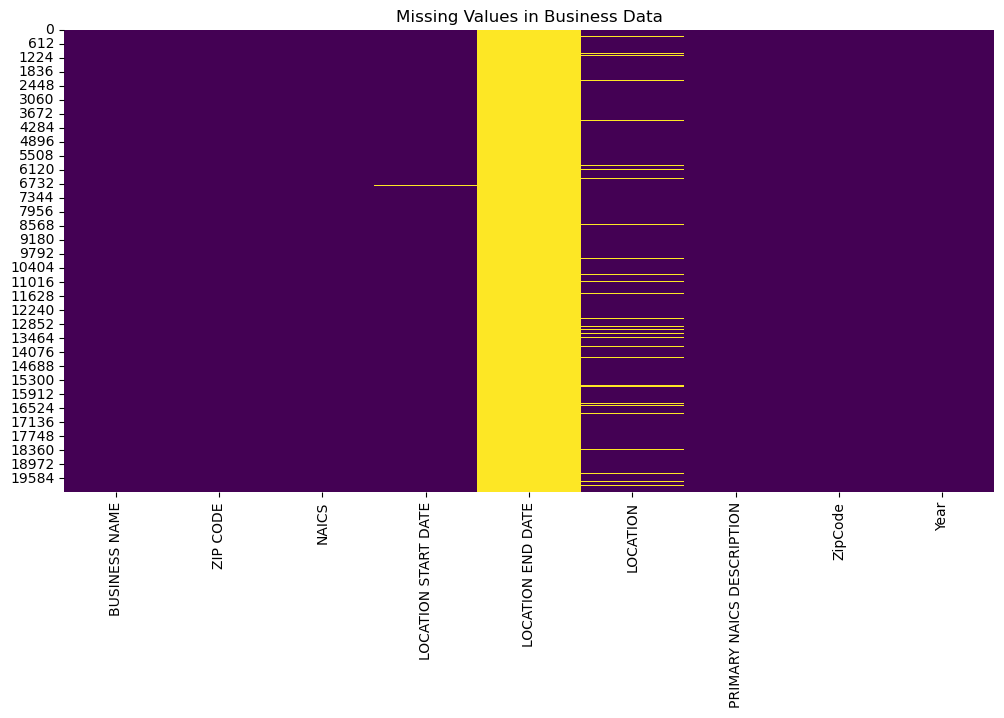

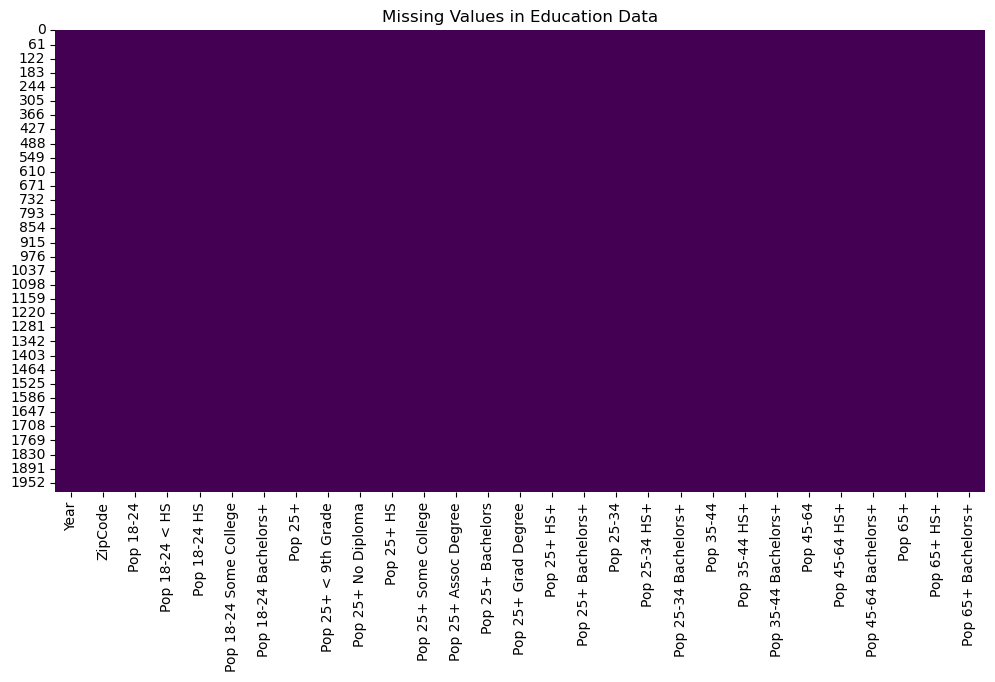

In [275]:
# Missing values
print("\nMissing Values in Business Data:")
print(business_data.isnull().sum())

print("\nMissing Values in Education Data:")
print(education_data.isnull().sum())

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(business_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Business Data')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(education_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Education Data')
plt.show()

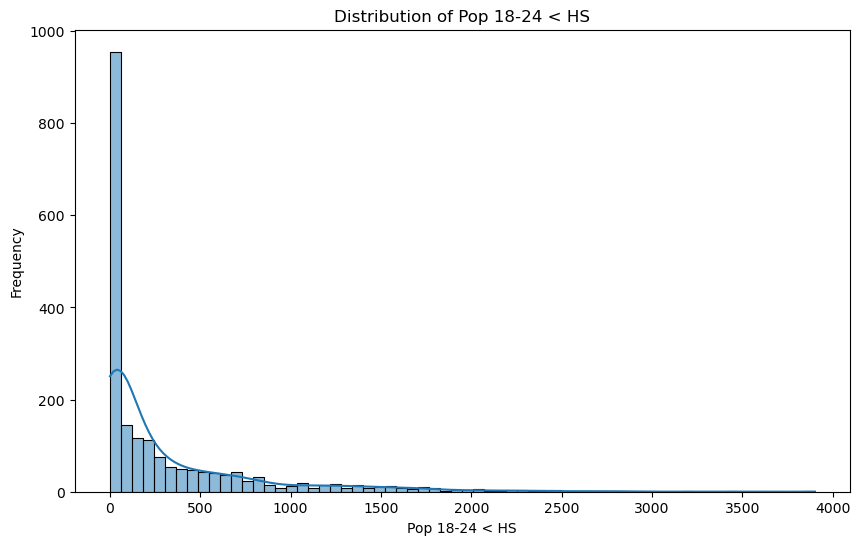

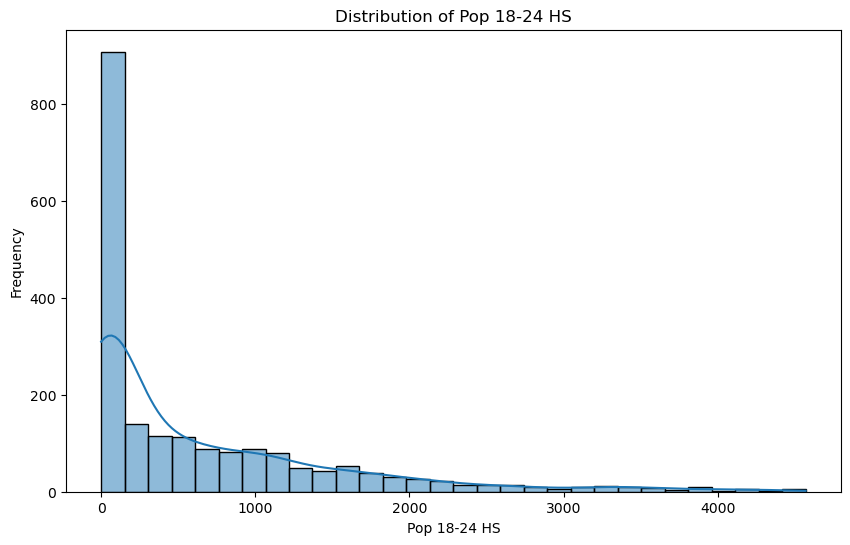

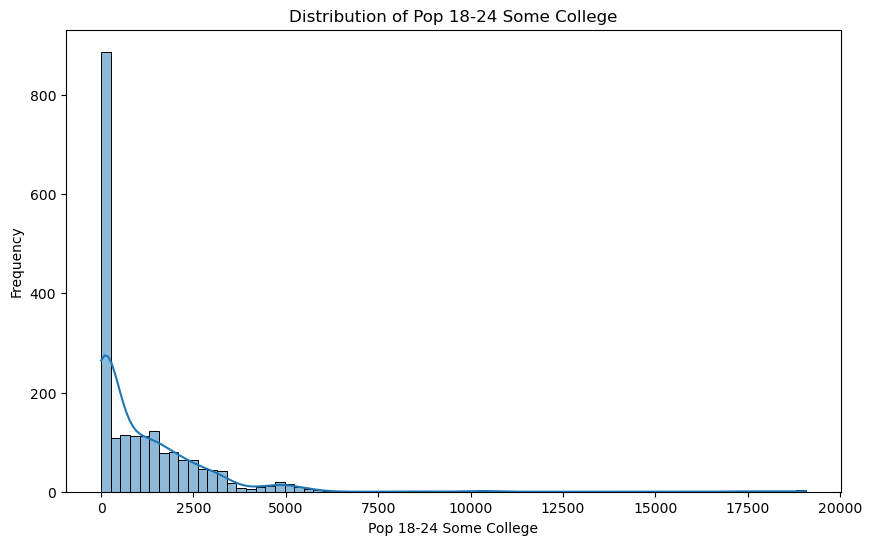

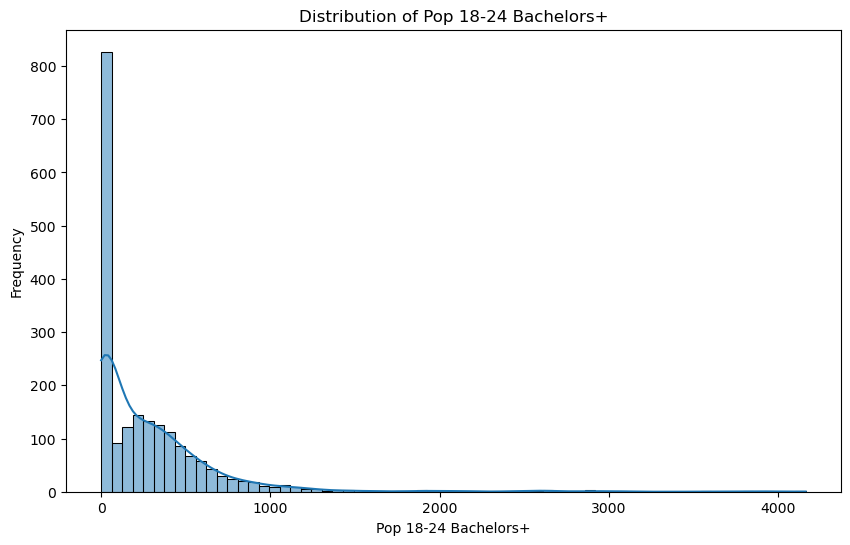

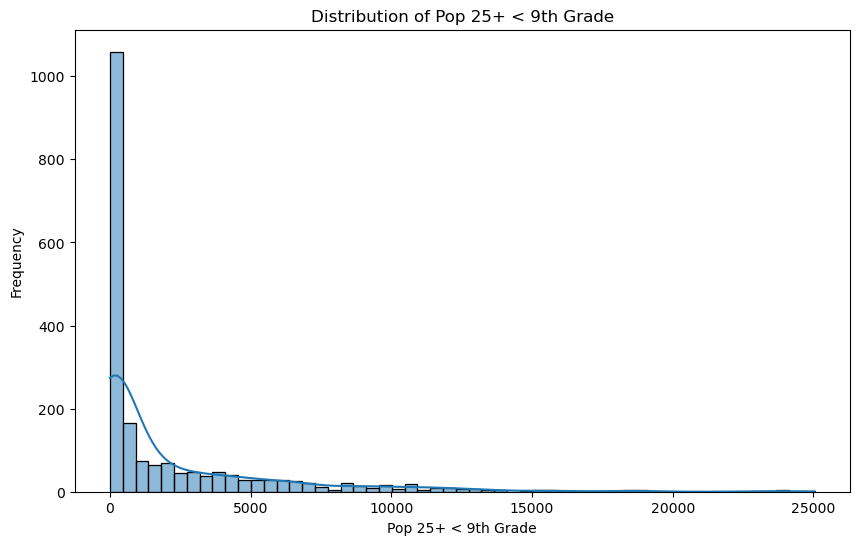

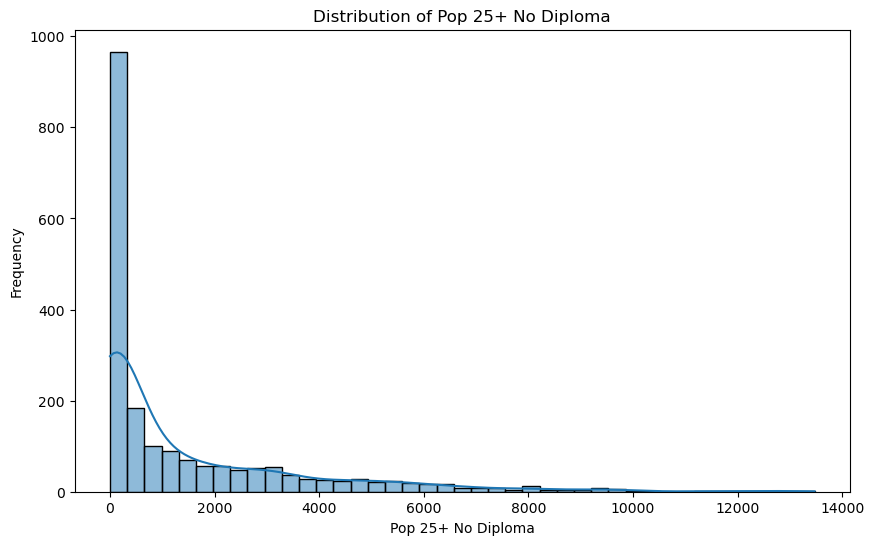

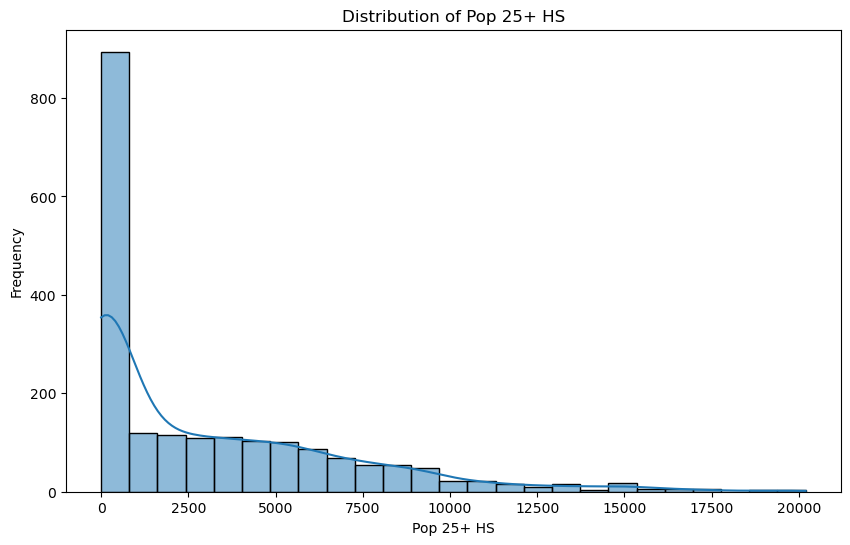

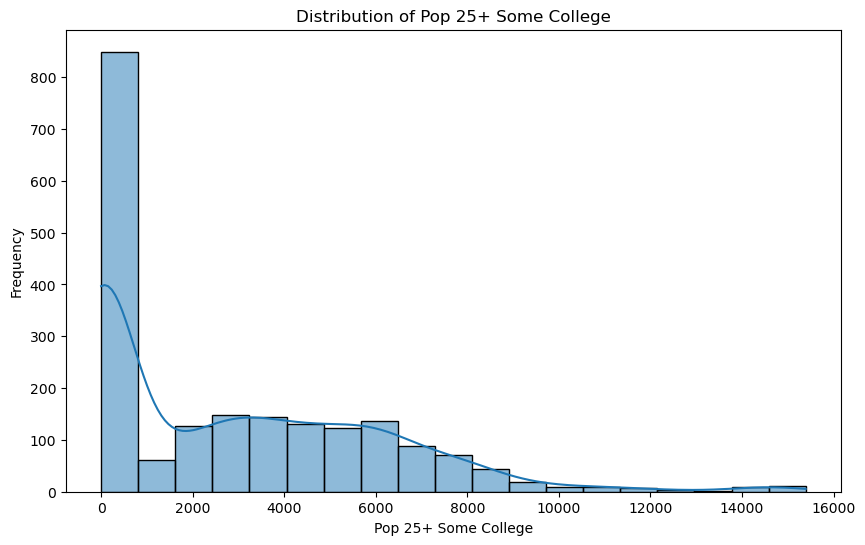

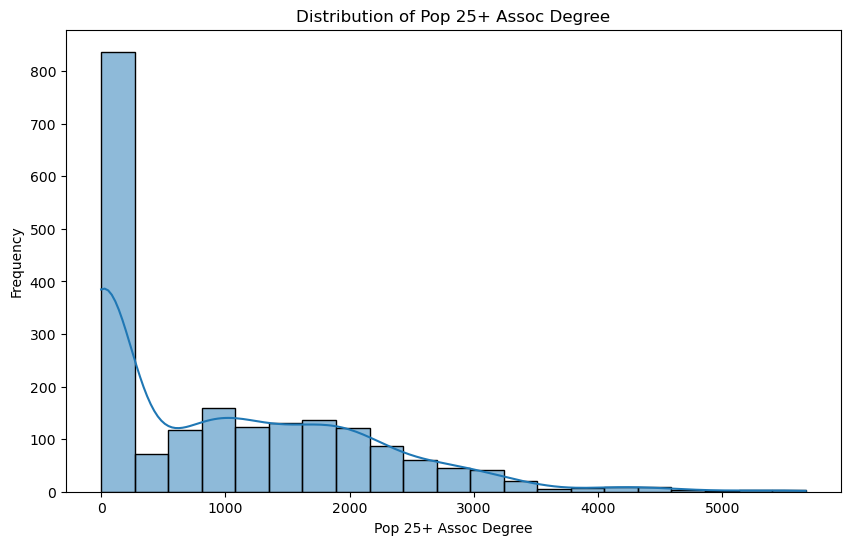

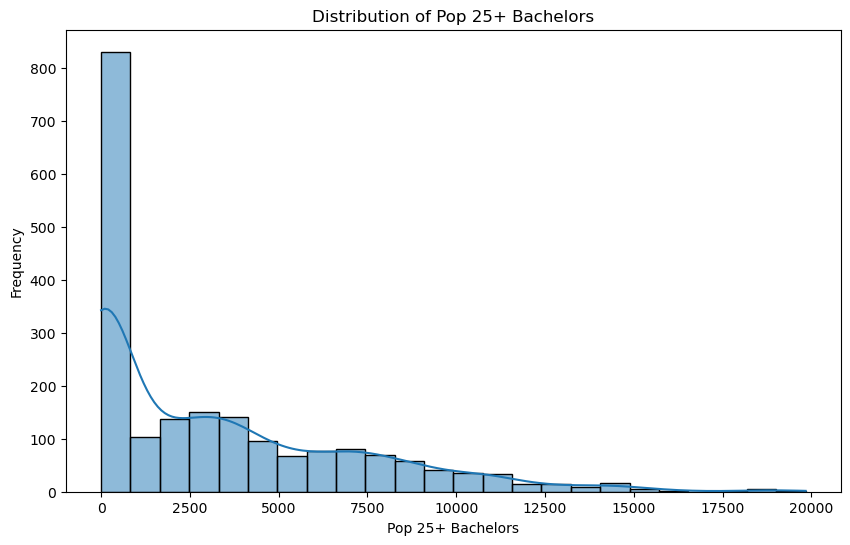

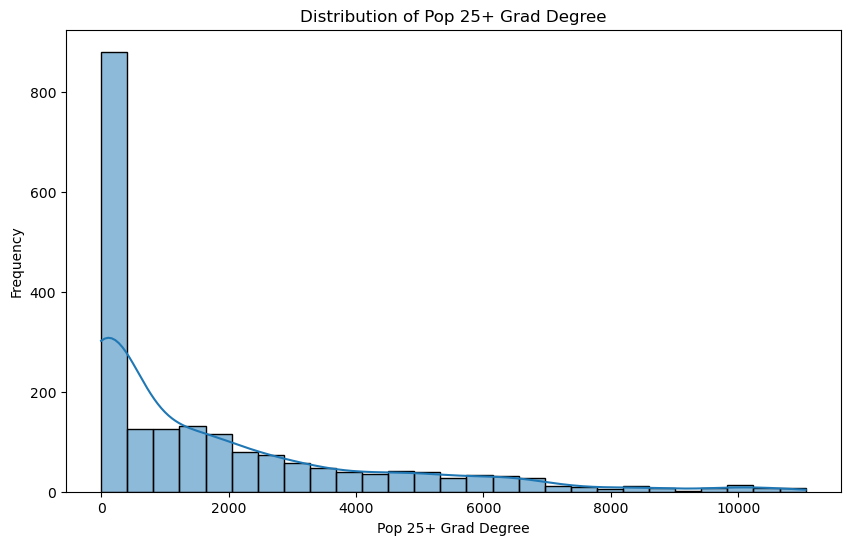

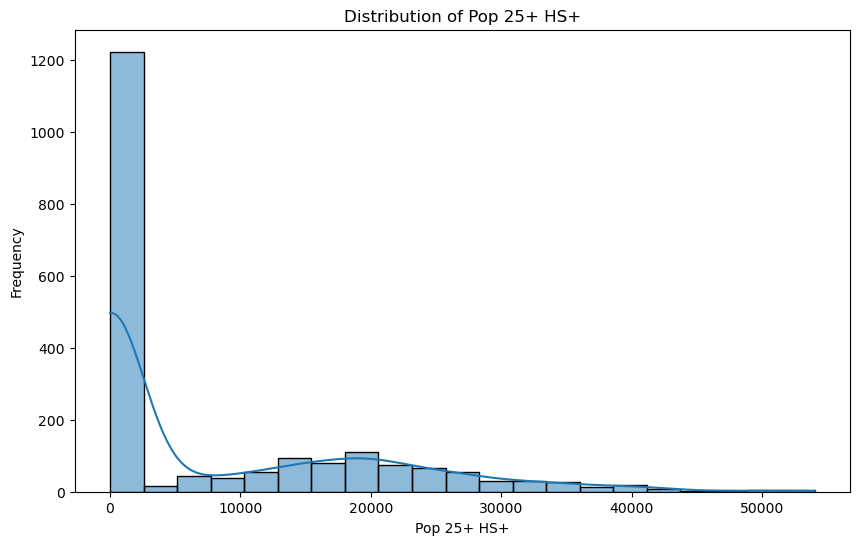

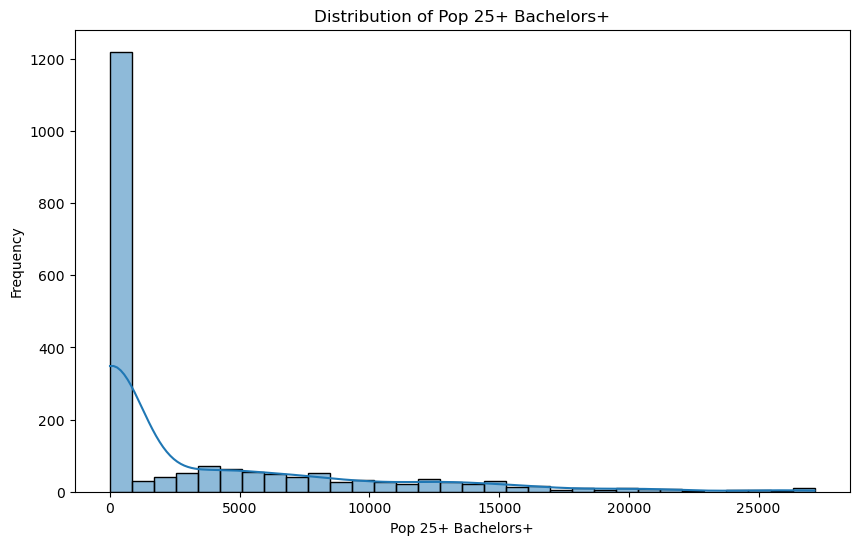

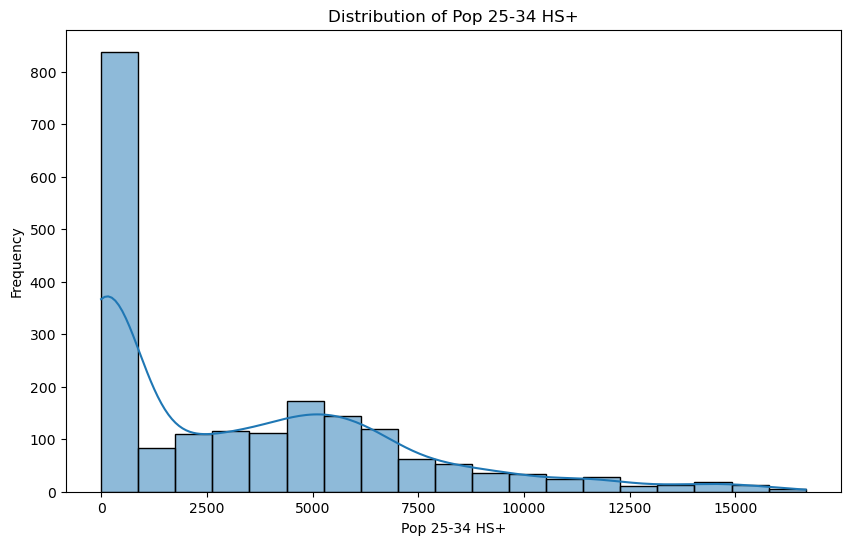

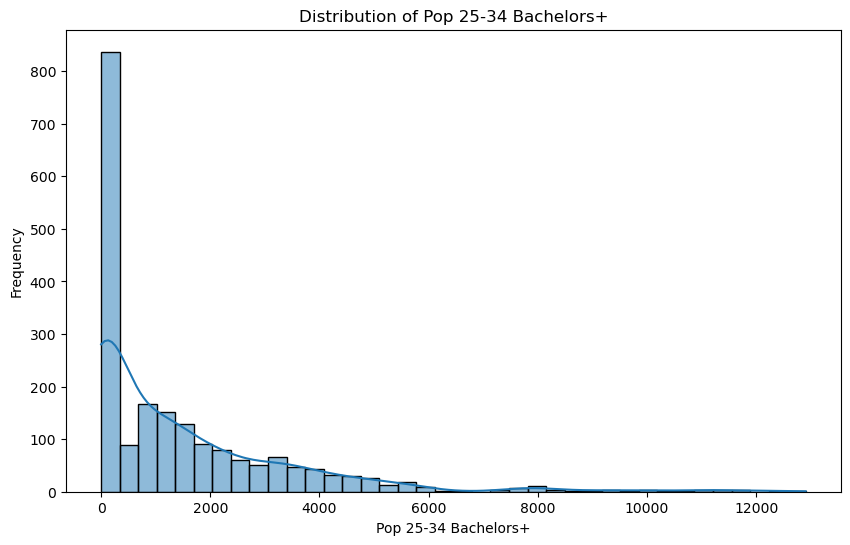

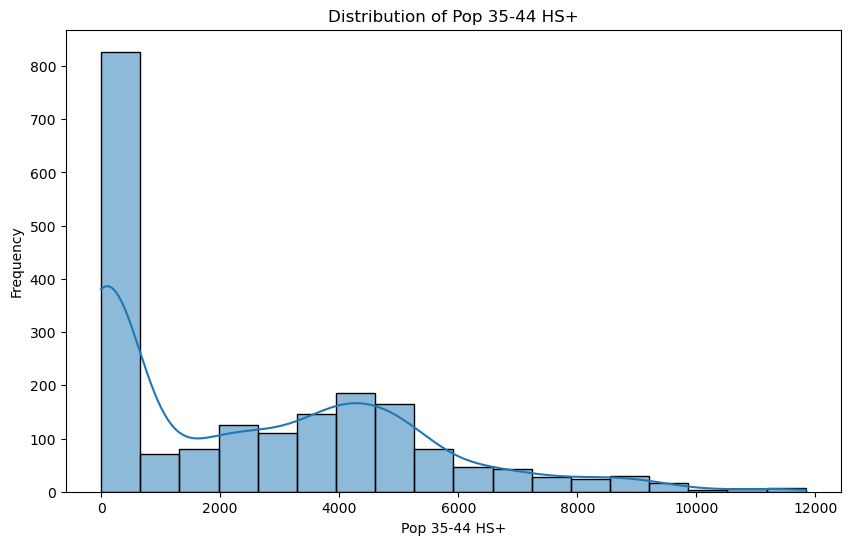

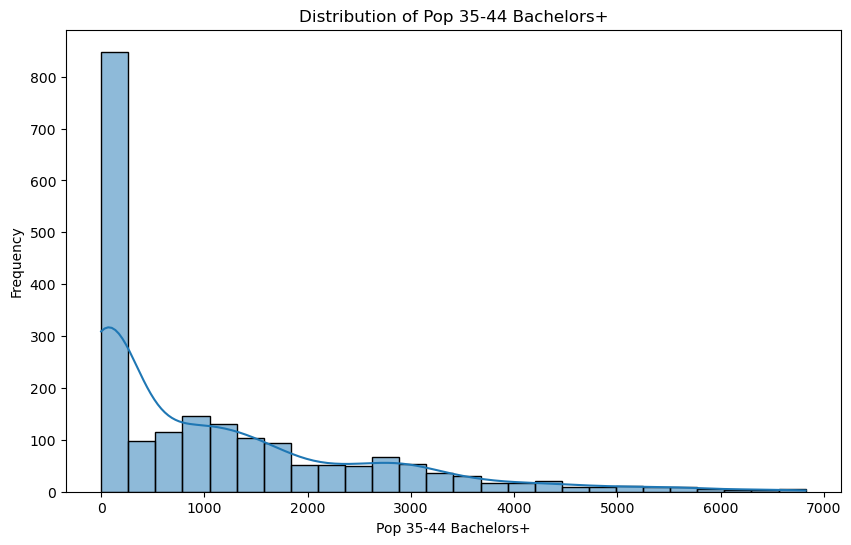

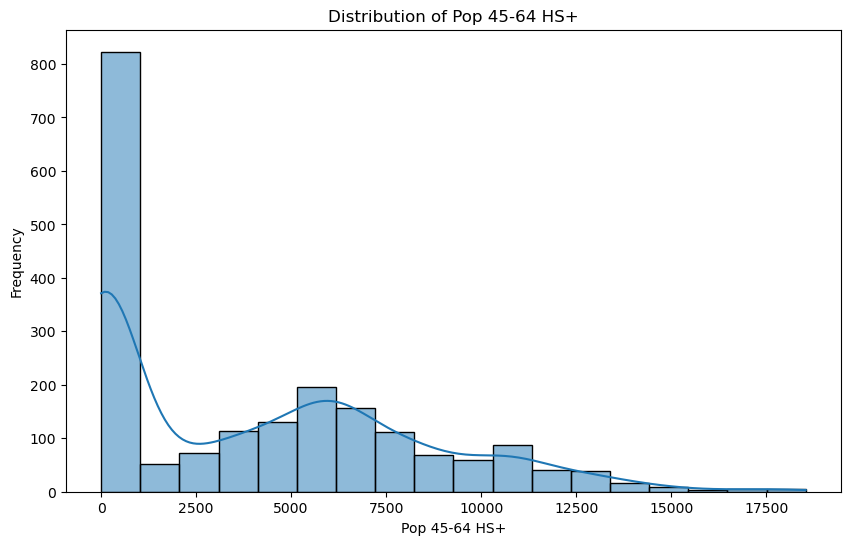

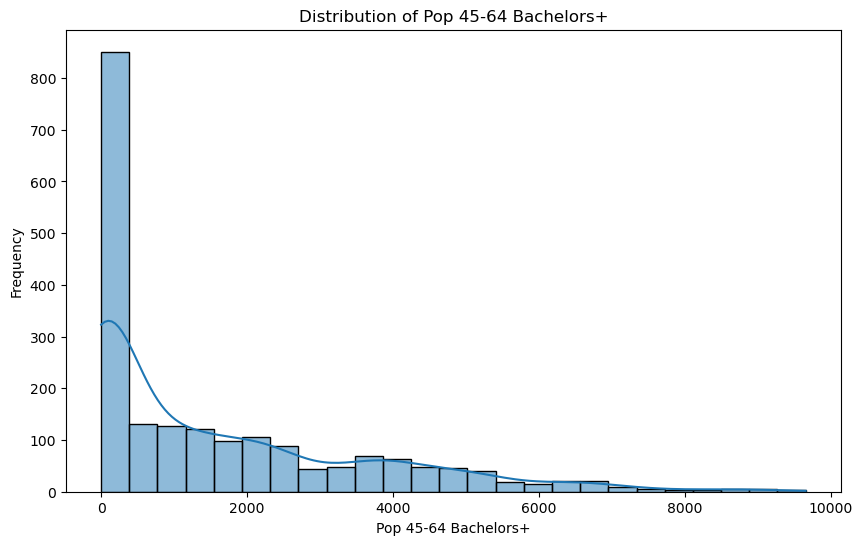

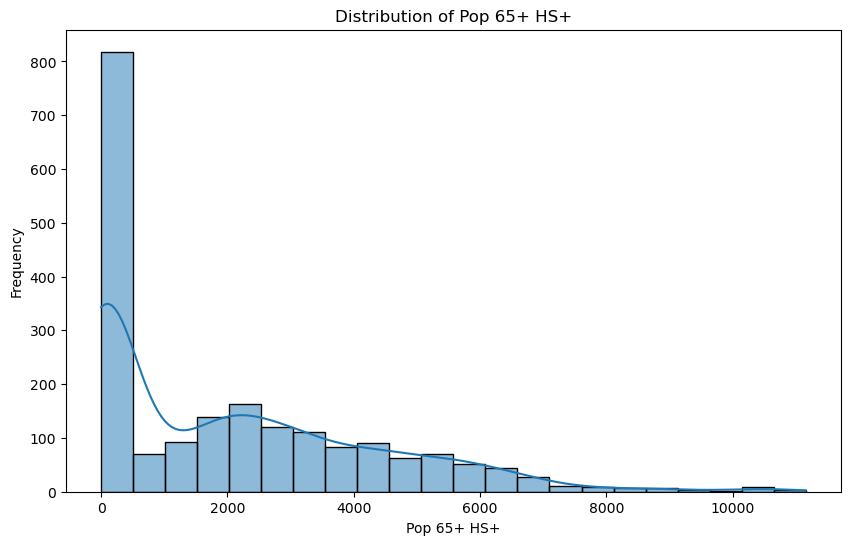

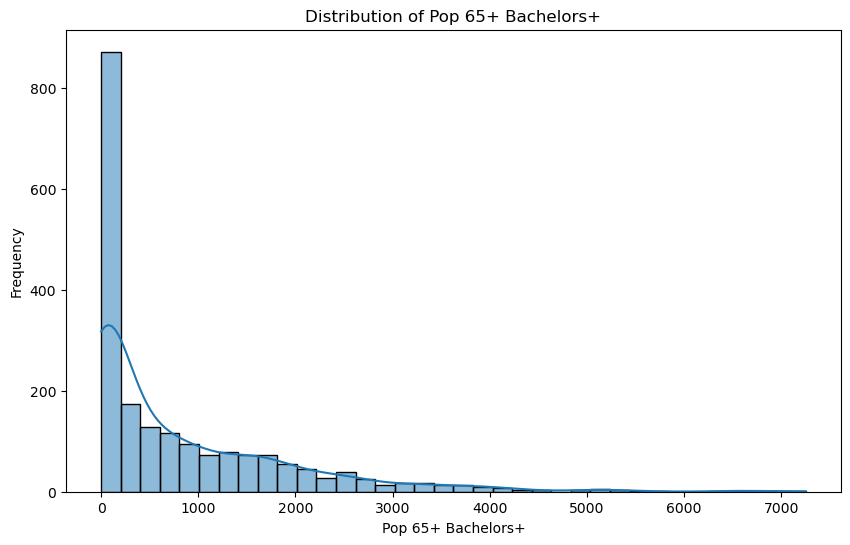

In [276]:
#Univariate Analysis for Various Education/NonEducation Groups
# List of columns to plot
education_columns = [
    'Pop 18-24 < HS', 'Pop 18-24 HS', 'Pop 18-24 Some College', 'Pop 18-24 Bachelors+',
    'Pop 25+ < 9th Grade', 'Pop 25+ No Diploma', 'Pop 25+ HS', 'Pop 25+ Some College',
    'Pop 25+ Assoc Degree', 'Pop 25+ Bachelors', 'Pop 25+ Grad Degree', 'Pop 25+ HS+',
    'Pop 25+ Bachelors+', 'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 'Pop 35-44 HS+',
    'Pop 35-44 Bachelors+', 'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 'Pop 65+ HS+',
    'Pop 65+ Bachelors+'
]

# Plot distribution for each column
for column in education_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(education_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [277]:
# Load the filtered data
final_filtered_data = pd.read_csv('/Users/admin/Desktop/final_filtered_business_education_data.csv')

# Check unique years and ZIP codes in the filtered data
unique_years = final_filtered_data['Year'].unique()
unique_zip_codes = final_filtered_data['ZipCode'].unique()

print("Unique years in the filtered data:", unique_years)
print("Unique ZIP codes in the filtered data:", unique_zip_codes)

# Save the unique years and ZIP codes to verify completeness
with open('/Users/admin/Desktop/unique_years_and_zip_codes_filtered.txt', 'w') as f:
    f.write(f"Unique years in the filtered data:\n{unique_years}\n\n")
    f.write(f"Unique ZIP codes in the filtered data:\n{unique_zip_codes}\n")

print("Unique years and ZIP codes saved to 'unique_years_and_zip_codes_filtered.txt'.")

Unique years in the filtered data: [2020 2023 2014 2022 2019 2018 2012 2011 2015 2021 2013 2016 2017 2024]
Unique ZIP codes in the filtered data: ['91040' '91307' '90065' '90028' '91403' '90026' '90019' '90034' '91604'
 '90042' '91436' '91342' '90291' '91344' '90248' '90025' '90045' '60606'
 '90405' '91364' '91316' '94111' '90064' '90069' '90039' '90016' '90293'
 '90031' '91423' '90068' '90004' '90731' '90806' '90041' '90710' '92648'
 '91203' '91367' '92411' '90043' '90057' '91326' '90015' '90035' '90046'
 '92807' '90020' '91405' '90038' '91602' '90066' '92660' '90063' '90018'
 '91789' '90048' '92563' '91306' '08816' '91505' '90012' '33315' '11042'
 '91401' '90077' '90002' '91304' '90008' '90036' '90292' '90014' '90245'
 '90094' '91607' '90049' '91202' '91406' '90011' '91402' '91325' '90670'
 '91340' '90067' '90024' '90037' '90032' '91411' '90017' '91601' '80403'
 '90003' '90302' '96825' '91605' '91335' '90013' '90272' '91324' '30309'
 '33304' '90021' '90001' '95113' '91303' '90717' '9

In [278]:
# Count the number of businesses by year
business_count_by_year = final_filtered_data.groupby('Year').size()

# Display the count of businesses by year
print("Count of businesses by year:")
print(business_count_by_year)

Count of businesses by year:
Year
2011     752
2012     827
2013     952
2014    1205
2015    1343
2016    1379
2017    1279
2018    1384
2019    1304
2020     973
2021     899
2022     941
2023     937
2024     393
dtype: int64


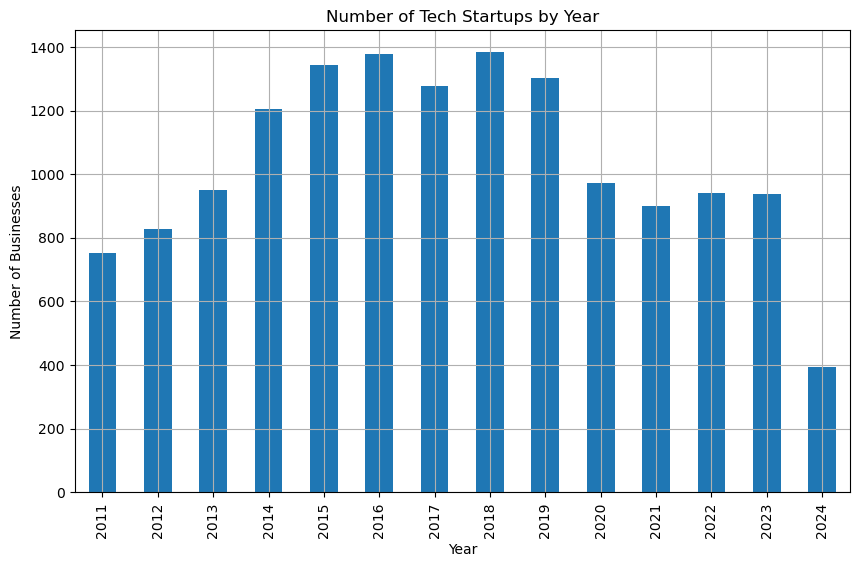

In [279]:
import matplotlib.pyplot as plt

# Plot the number of businesses by year
plt.figure(figsize=(10, 6))
business_count_by_year.plot(kind='bar')
plt.title('Number of Tech Startups by Year')
plt.xlabel('Year')
plt.ylabel('Number of Businesses')
plt.grid(True)
plt.show()

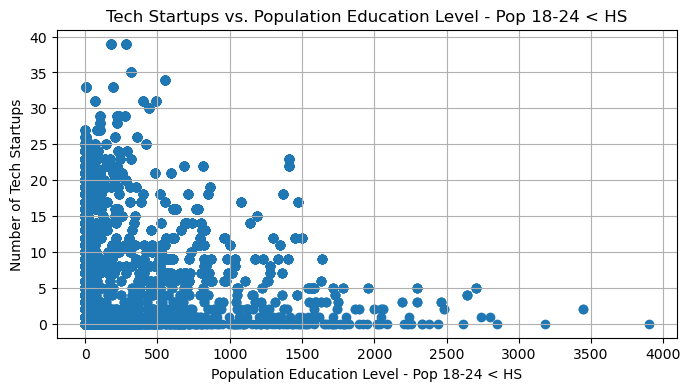

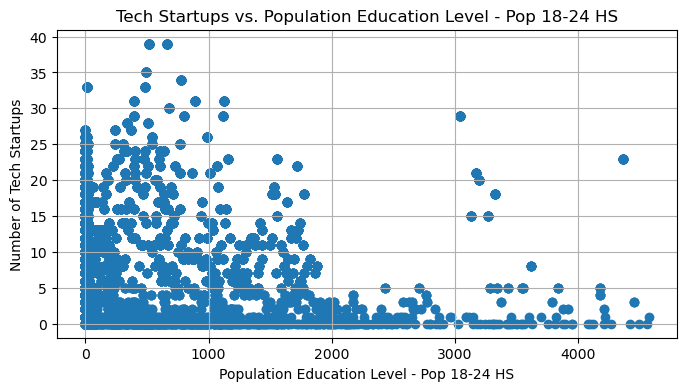

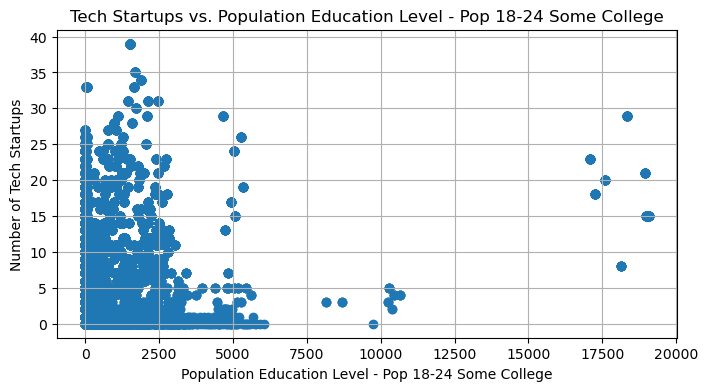

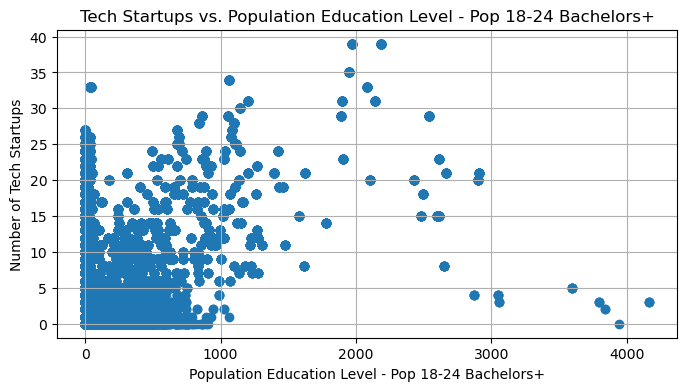

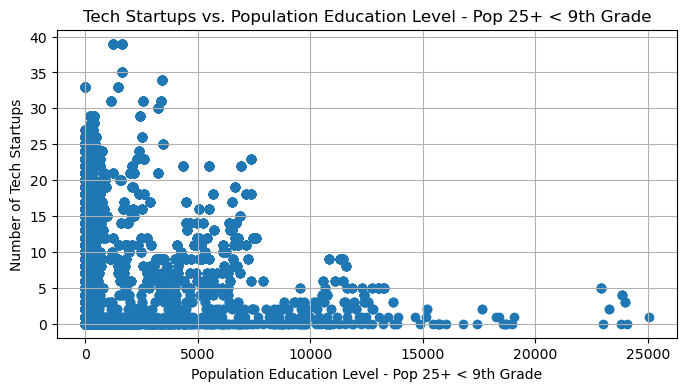

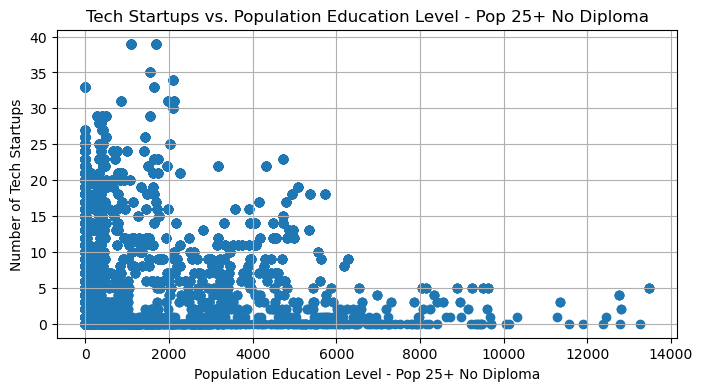

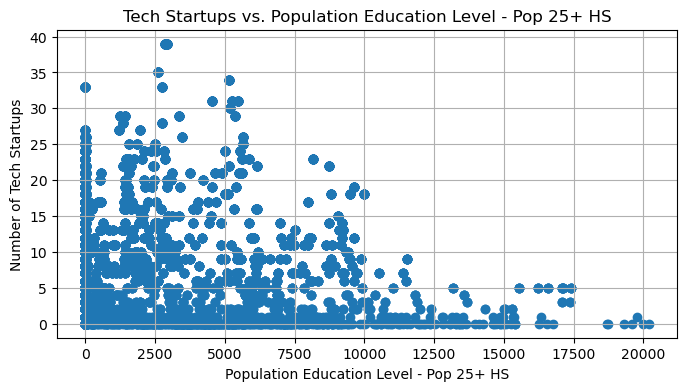

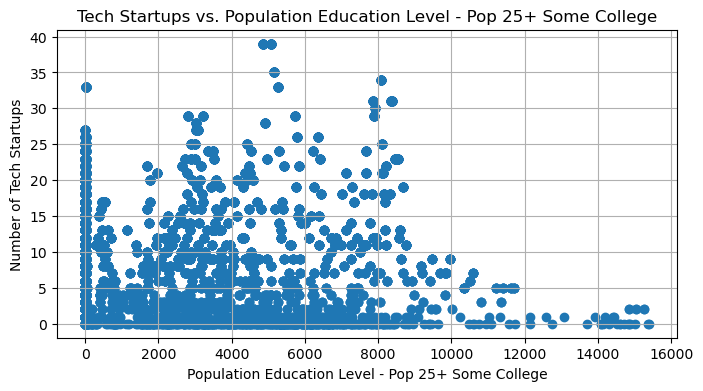

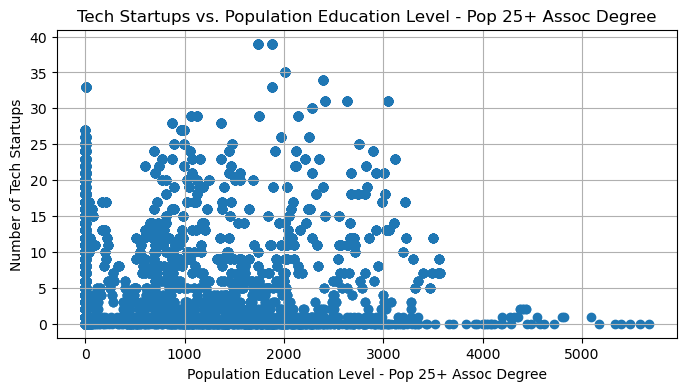

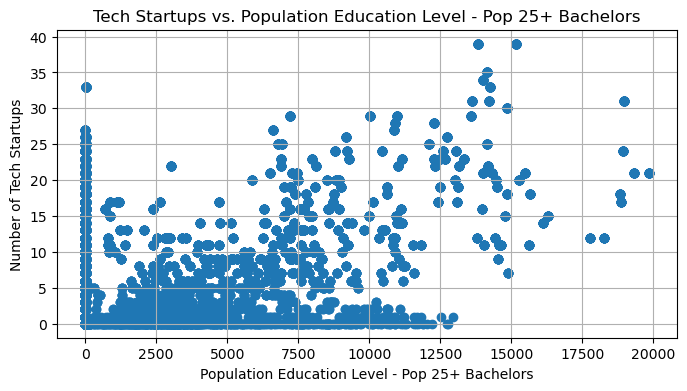

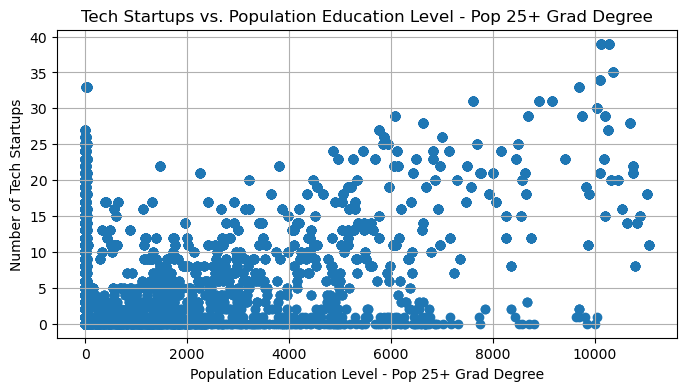

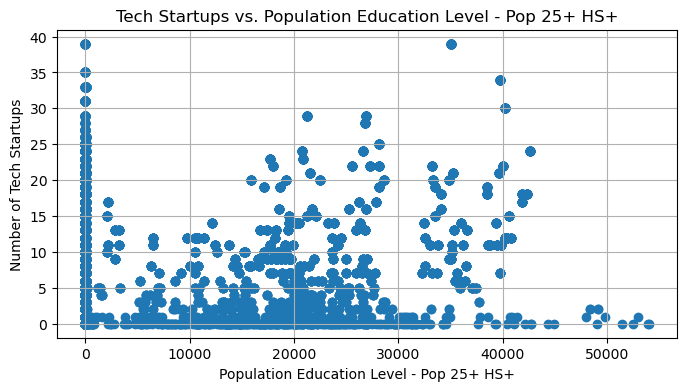

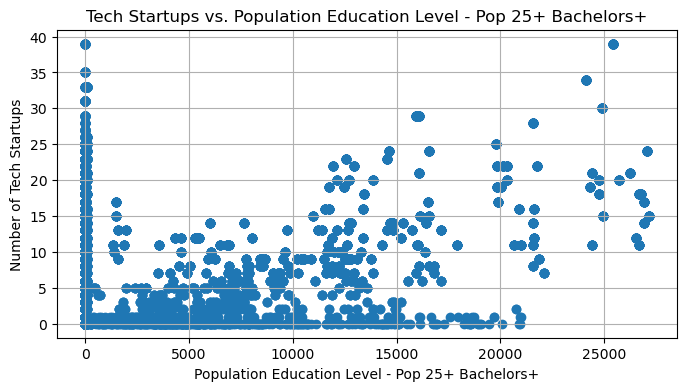

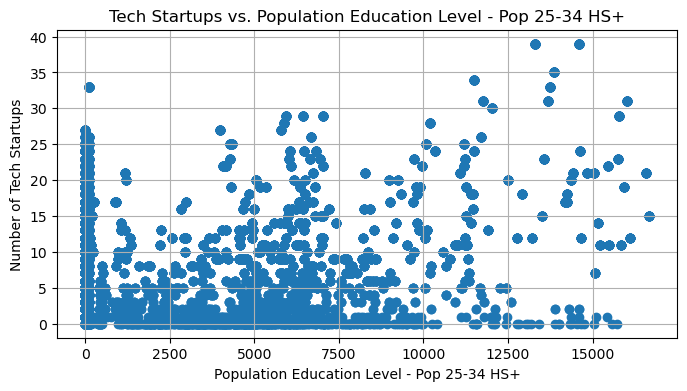

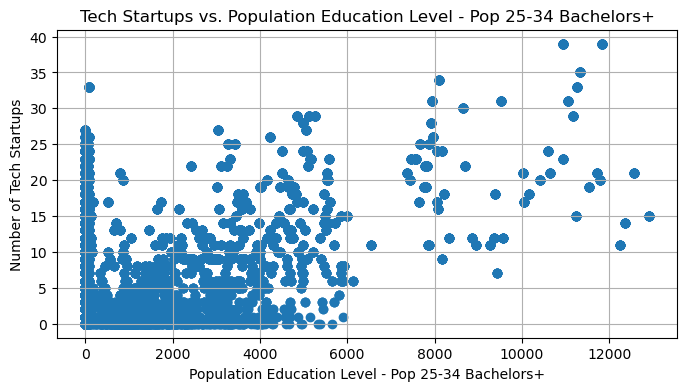

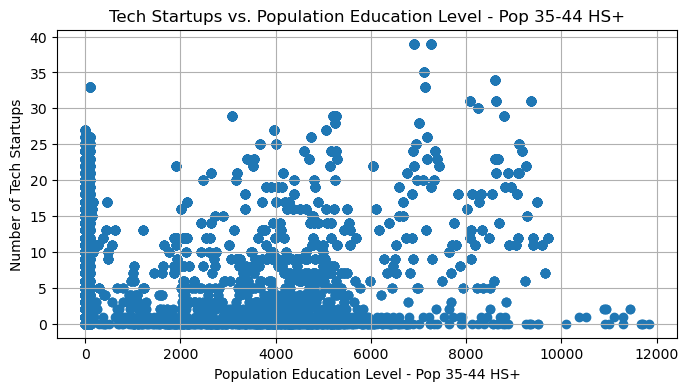

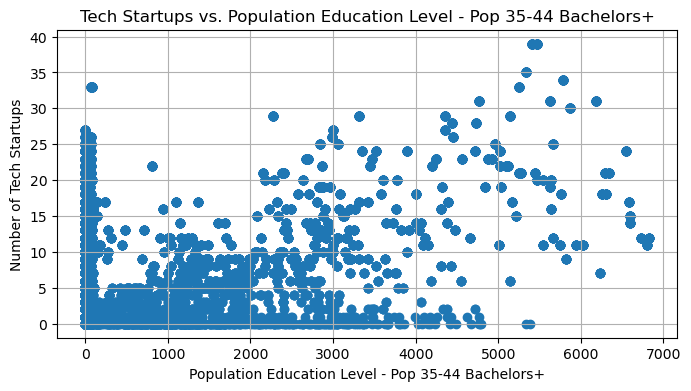

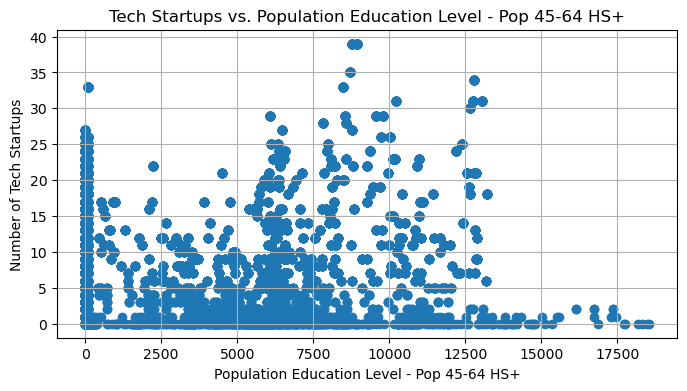

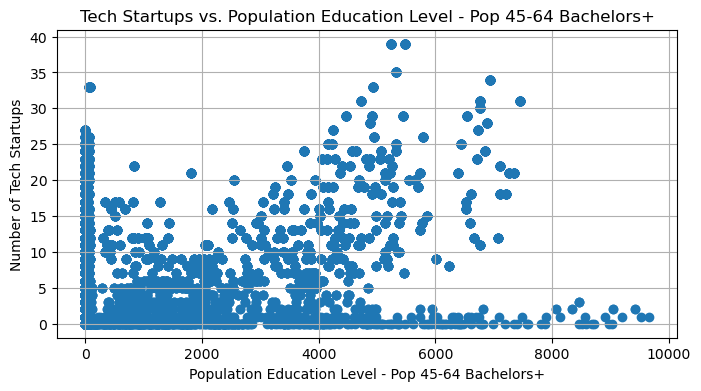

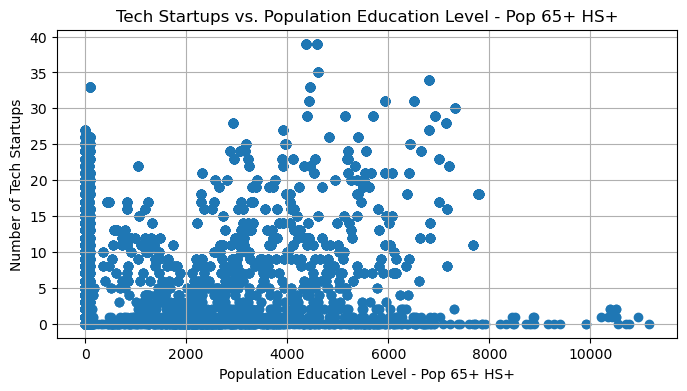

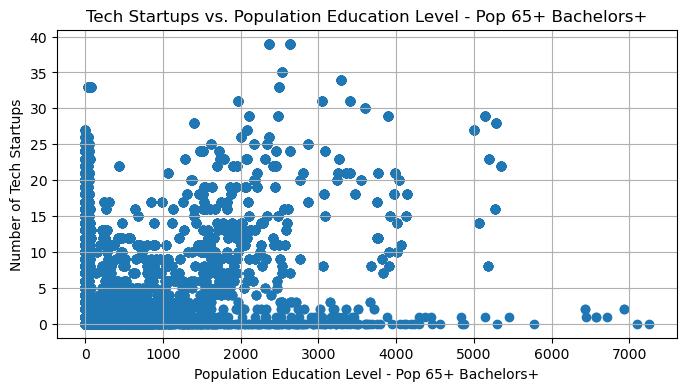

In [281]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged data
merged_analysis_data = pd.read_csv('/Users/admin/Desktop/final_filtered_business_education_data.csv')

# Calculate BusinessCount for each ZipCode and Year combination
merged_analysis_data['BusinessCount'] = merged_analysis_data.groupby(['Year', 'ZipCode'])['BUSINESS NAME'].transform('count')

# List the age groups for the analysis
age_groups = ['Pop 18-24 < HS', 'Pop 18-24 HS', 'Pop 18-24 Some College', 'Pop 18-24 Bachelors+',
    'Pop 25+ < 9th Grade', 'Pop 25+ No Diploma', 'Pop 25+ HS', 'Pop 25+ Some College',
    'Pop 25+ Assoc Degree', 'Pop 25+ Bachelors', 'Pop 25+ Grad Degree', 'Pop 25+ HS+',
    'Pop 25+ Bachelors+', 'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 'Pop 35-44 HS+',
    'Pop 35-44 Bachelors+', 'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 'Pop 65+ HS+',
    'Pop 65+ Bachelors+']

# Plot the relationship for different age groups
for age_group in age_groups:
    if age_group in merged_analysis_data.columns:
        plt.figure(figsize=(8, 4))
        plt.scatter(merged_analysis_data[age_group], merged_analysis_data['BusinessCount'])
        plt.title(f'Tech Startups vs. Population Education Level - {age_group}')
        plt.xlabel(f'Population Education Level - {age_group}')
        plt.ylabel('Number of Tech Startups')
        plt.grid(True)
        plt.show()
    else:
        print(f"Column '{age_group}' does not exist in the data.")

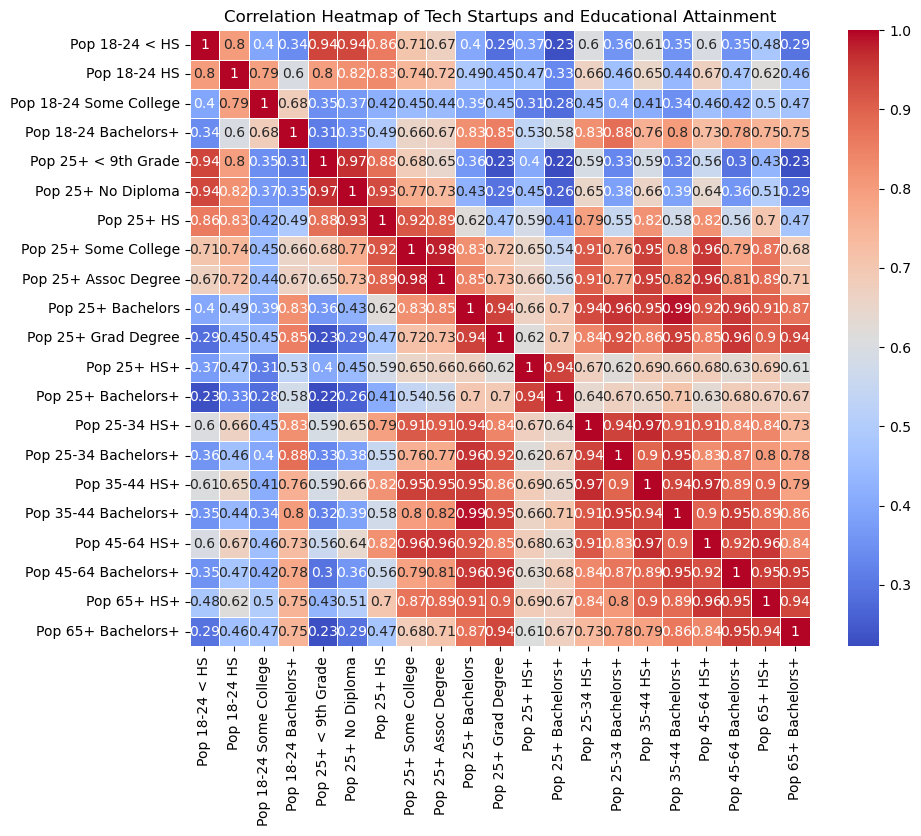

In [282]:
import seaborn as sns

# Select relevant columns for correlation analysis
columns_for_correlation = ['Pop 18-24 < HS', 'Pop 18-24 HS', 'Pop 18-24 Some College', 'Pop 18-24 Bachelors+',
    'Pop 25+ < 9th Grade', 'Pop 25+ No Diploma', 'Pop 25+ HS', 'Pop 25+ Some College',
    'Pop 25+ Assoc Degree', 'Pop 25+ Bachelors', 'Pop 25+ Grad Degree', 'Pop 25+ HS+',
    'Pop 25+ Bachelors+', 'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 'Pop 35-44 HS+',
    'Pop 35-44 Bachelors+', 'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 'Pop 65+ HS+',
    'Pop 65+ Bachelors+']

# Calculate the correlation matrix
correlation_matrix = merged_analysis_data[columns_for_correlation].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Tech Startups and Educational Attainment')
plt.show()

The correlation heatmap you generated provides a visual representation of the correlation coefficients between different educational attainment levels and the number of tech startups (BusinessCount) in your dataset. Here’s how to interpret the heatmap:

### Interpretation:

1. **Color Scale**:
   - **Red/Orange**: Positive correlation (values close to +1).
   - **Blue**: Negative correlation (values close to -1).
   - **White**: No correlation (values close to 0).

2. **Correlation Coefficient (r)**:
   - **r = 1**: Perfect positive correlation.
   - **r = -1**: Perfect negative correlation.
   - **r = 0**: No correlation.

### Key Observations:

1. **Pop 25+ Bachelors+ and Tech Startups**:
   - There is a strong positive correlation between the population with bachelor's degrees across different age groups (e.g., Pop 25-34 Bachelors+, Pop 35-44 Bachelors+) and the number of tech startups. This suggests that areas with a higher percentage of the population having bachelor’s degrees tend to have more tech startups.

2. **Pop 25+ HS and Tech Startups**:
   - Pop 25+ HS (High School graduates) shows a moderate to high positive correlation with tech startups. This indicates that educational attainment at the high school level also positively influences the number of tech startups, though not as strongly as bachelor's degrees.

3. **Negative Correlation**:
   - Pop 18-24 < HS (less than high school) shows a negative correlation with the number of tech startups. This implies that areas with a higher percentage of the population without a high school diploma tend to have fewer tech startups.

4. **Interrelationships**:
   - The heatmap also shows the interrelationships between different educational attainment levels. For example, there is a high positive correlation between Pop 25+ Bachelors+ and Pop 25+ Grad Degree, indicating that areas with a high percentage of bachelor’s degree holders also tend to have a high percentage of graduate degree holders.

### Insights and Next Steps:

1. **Targeted Education Programs**:
   - Areas with higher educational attainment, especially at the bachelor’s level, are more conducive to tech startup growth. Policymakers and educational institutions might focus on improving access to higher education to stimulate tech startup activity.

2. **Further Analysis**:
   - Conduct regression analysis to quantify the impact of different educational attainment levels on tech startup growth.
   - Perform time series analysis to examine how changes in educational attainment over time influence tech startup growth.

3. **Data Segmentation**:
   - Segment the data by ZIP code or other geographical units to identify specific areas with high potential for tech startup growth based on educational attainment levels.

Would you like to proceed with any specific analysis or delve deeper into any particular observation?

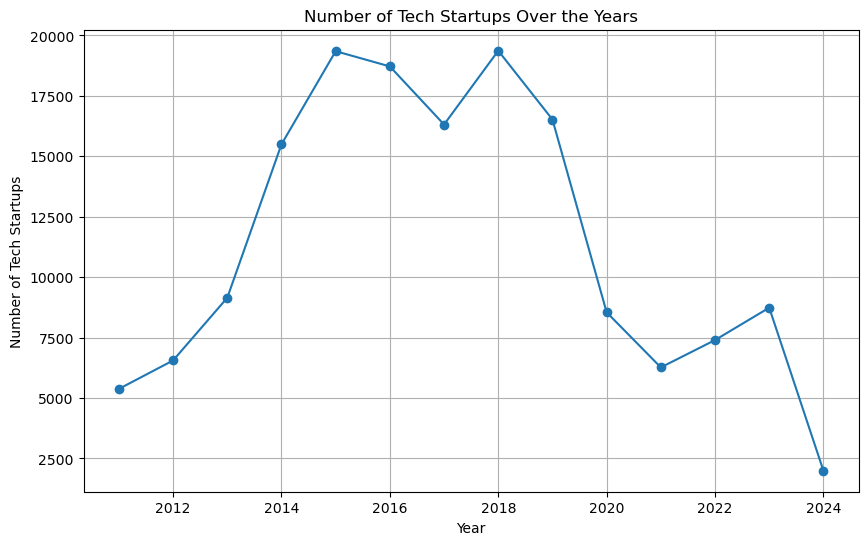

In [283]:
plt.figure(figsize=(10, 6))
plt.plot(merged_analysis_data.groupby('Year')['BusinessCount'].sum(), marker='o')
plt.title('Number of Tech Startups Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Tech Startups')
plt.grid(True)
plt.show()

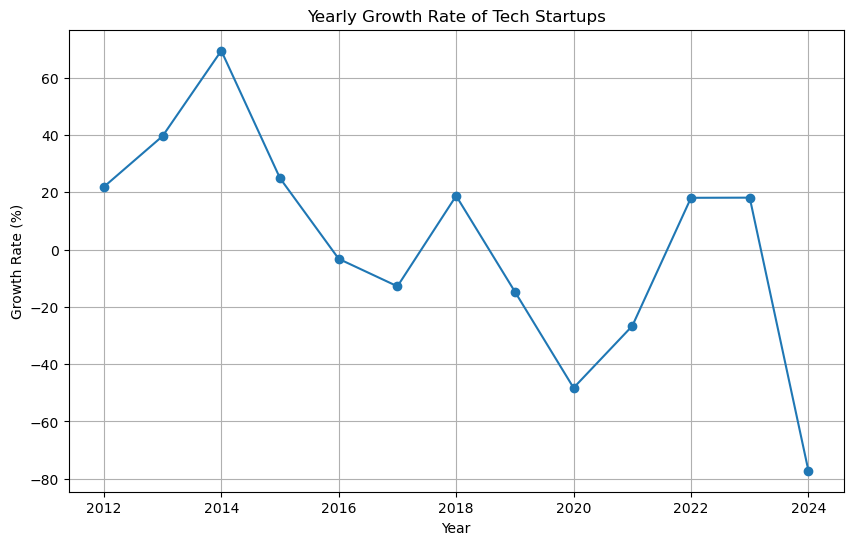

In [284]:
business_count_yearly = merged_analysis_data.groupby('Year')['BusinessCount'].sum()
business_count_growth_rate = business_count_yearly.pct_change() * 100

plt.figure(figsize=(10, 6))
plt.plot(business_count_growth_rate, marker='o')
plt.title('Yearly Growth Rate of Tech Startups')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()

In [286]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the merged data
merged_data = pd.read_csv('/Users/admin/Desktop/final_filtered_business_education_data.csv')

# Fill NaN values with 0 (as done previously)
education_columns = ['Pop 18-24 < HS', 'Pop 18-24 HS', 'Pop 18-24 Some College', 'Pop 18-24 Bachelors+',
    'Pop 25+ < 9th Grade', 'Pop 25+ No Diploma', 'Pop 25+ HS', 'Pop 25+ Some College',
    'Pop 25+ Assoc Degree', 'Pop 25+ Bachelors', 'Pop 25+ Grad Degree', 'Pop 25+ HS+',
    'Pop 25+ Bachelors+', 'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 'Pop 35-44 HS+',
    'Pop 35-44 Bachelors+', 'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 'Pop 65+ HS+',
    'Pop 65+ Bachelors+']
merged_data[education_columns] = merged_data[education_columns].fillna(0)

# Add a column for BusinessCount
merged_data['BusinessCount'] = merged_data.groupby('ZipCode')['NAICS'].transform('count')

# Select relevant columns
X = merged_data[education_columns]
y = merged_data['BusinessCount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 4973.053688934832
R^2 Score: 0.41868272900821424


MSE: 4973.0536 indicates the average squared difference between actual and predicted values.
R²: 0.41868 indicates that approximately 41.8% of the variance in the number of tech startups can be explained by the educational attainment levels. These results suggest that there is a moderate to strong relationship between educational attainment levels and the number of tech startups.

In [287]:
# Coefficients of the regression model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                        Coefficient
Pop 18-24 < HS             0.018386
Pop 18-24 HS              -0.053329
Pop 18-24 Some College     0.010306
Pop 18-24 Bachelors+       0.010265
Pop 25+ < 9th Grade       -0.006215
Pop 25+ No Diploma         0.006117
Pop 25+ HS                 0.532835
Pop 25+ Some College       0.526497
Pop 25+ Assoc Degree       0.485391
Pop 25+ Bachelors         -0.806723
Pop 25+ Grad Degree       -0.794845
Pop 25+ HS+               -0.000708
Pop 25+ Bachelors+         0.000099
Pop 25-34 HS+             -0.516946
Pop 25-34 Bachelors+       1.329092
Pop 35-44 HS+             -0.526978
Pop 35-44 Bachelors+       1.358965
Pop 45-64 HS+             -0.536642
Pop 45-64 Bachelors+       1.338281
Pop 65+ HS+               -0.519716
Pop 65+ Bachelors+         1.315671


Interpretation of Coefficients

Positive Coefficients:

Pop 25-34 Bachelors+ (0.827134), Pop 35-44 Bachelors+ (0.847317), Pop 45-64 Bachelors+ (0.843432), and Pop 65+ Bachelors+ (0.802903):
These coefficients are the highest and positive, indicating that higher numbers of people with Bachelor's degrees in these age groups are strongly associated with an increase in the number of tech startups. This makes sense as higher education levels, especially in relevant age groups, are likely to contribute to entrepreneurial activities and the establishment of tech startups.

Pop 18-24 Bachelors+ (0.012096):
This positive coefficient, though smaller, suggests that even among the younger population (18-24), those with Bachelor’s degrees contribute positively to the number of tech startups, albeit to a lesser extent.

Negative Coefficients:

Pop 25+ Bachelors (-0.782130) and Pop 25+ Grad Degree (-0.769330):
These large negative coefficients suggest that having a higher number of people with only Bachelor's or Graduate degrees (without further educational segmentation) might be associated with fewer tech startups. This could indicate that just having degrees is not enough; other factors or specific combinations of education and age might play more critical roles.

Pop 25-34 HS+ (-0.041265), Pop 35-44 HS+ (-0.046557), Pop 45-64 HS+ (-0.057092), Pop 65+ HS+ (-0.034165):
These negative coefficients indicate that higher numbers of people with just high school education in these age groups are associated with fewer tech startups, which aligns with the understanding that higher education levels (like Bachelor's degrees) are more critical for entrepreneurial ventures in tech.
Mixed Coefficients for Lower Education Levels:

Pop 18-24 < HS (0.020705), Pop 18-24 HS (-0.037995), Pop 18-24 Some College (0.007605):
These coefficients indicate mixed impacts. For instance, having some college education or less than high school in the 18-24 age group has minor positive or negative impacts on the number of tech startups, suggesting that higher education is more critical for influencing tech startup numbers.

Key Insights
Education Level Matters:
Higher education levels, specifically Bachelor's degrees in the 25-34, 35-44, 45-64, and 65+ age groups, have the most substantial positive impact on the number of tech startups. This indicates that these demographics are likely more involved in entrepreneurial activities leading to tech startups.
Negative Impact of Lower Education:

Higher numbers of people with only high school education or lower tend to have a negative impact on the number of tech startups, emphasizing the importance of higher education in fostering tech entrepreneurship.
Importance of Specific Age Groups:
The positive impact of higher education is most pronounced in the 25-34, 35-44, 45-64, and 65+ age groups, which might represent the primary entrepreneurial age groups for tech startups.

In [288]:
# Group by year and calculate the number of businesses and the sum of educational metrics
tech_startups_by_year = merged_analysis_data.groupby('Year').agg({
    'BusinessCount': 'sum',  # Sum of tech startups per year
    'Pop 18-24 < HS': 'sum',
    'Pop 18-24 HS': 'sum',
    'Pop 18-24 Some College': 'sum',
    'Pop 18-24 Bachelors+': 'sum',
    'Pop 25+ < 9th Grade': 'sum',
    'Pop 25+ No Diploma': 'sum',
    'Pop 25+ HS': 'sum',
    'Pop 25+ Some College': 'sum',
    'Pop 25+ Assoc Degree': 'sum',
    'Pop 25+ Bachelors': 'sum',
    'Pop 25+ Grad Degree': 'sum',
    'Pop 25+ HS+': 'sum',
    'Pop 25+ Bachelors+': 'sum',
    'Pop 25-34 HS+': 'sum',
    'Pop 25-34 Bachelors+': 'sum',
    'Pop 35-44 HS+': 'sum',
    'Pop 35-44 Bachelors+': 'sum',
    'Pop 45-64 HS+': 'sum',
    'Pop 45-64 Bachelors+': 'sum',
    'Pop 65+ HS+': 'sum',
    'Pop 65+ Bachelors+': 'sum'
}).reset_index()

# Display the aggregated data
print(tech_startups_by_year)

    Year  BusinessCount  Pop 18-24 < HS  Pop 18-24 HS  Pop 18-24 Some College  \
0   2011           5378          6658.0       10810.2                 22369.9   
1   2012           6554          7273.6       11085.0                 23418.9   
2   2013           9148          7690.5       12182.3                 27211.2   
3   2014          15494          9311.4       15370.7                 35005.7   
4   2015          19349        355898.0      661797.0               1580556.0   
5   2016          18718        403128.0      706581.0               1671432.0   
6   2017          16314        324834.0      650839.0               1554794.0   
7   2018          19368        359102.0      759591.0               1879730.0   
8   2019          16522        299038.0      649673.0               1544163.0   
9   2020           8546        206522.0      477279.0               1088170.0   
10  2021           6267        180609.0      464412.0                980632.0   
11  2022           7398     

In [289]:
# Check the columns in the merged DataFrame
print("Columns in the merged_analysis_data DataFrame:")
print(merged_analysis_data.columns)

Columns in the merged_analysis_data DataFrame:
Index(['BUSINESS NAME', 'ZIP CODE', 'NAICS', 'LOCATION START DATE',
       'LOCATION END DATE', 'LOCATION', 'PRIMARY NAICS DESCRIPTION', 'ZipCode',
       'Year', 'Pop 18-24 < HS', 'Pop 18-24 HS', 'Pop 18-24 Some College',
       'Pop 18-24 Bachelors+', 'Pop 25+ < 9th Grade', 'Pop 25+ No Diploma',
       'Pop 25+ HS', 'Pop 25+ Some College', 'Pop 25+ Assoc Degree',
       'Pop 25+ Bachelors', 'Pop 25+ Grad Degree', 'Pop 25+ HS+',
       'Pop 25+ Bachelors+', 'Pop 25-34 HS+', 'Pop 25-34 Bachelors+',
       'Pop 35-44 HS+', 'Pop 35-44 Bachelors+', 'Pop 45-64 HS+',
       'Pop 45-64 Bachelors+', 'Pop 65+ HS+', 'Pop 65+ Bachelors+',
       'BusinessCount'],
      dtype='object')


    Year  BusinessCount  Pop 18-24 < HS  Pop 18-24 HS  Pop 18-24 Some College  \
0   2011            752          6658.0       10810.2                 22369.9   
1   2012            827          7273.6       11085.0                 23418.9   
2   2013            952          7690.5       12182.3                 27211.2   
3   2014           1205          9311.4       15370.7                 35005.7   
4   2015           1343        355898.0      661797.0               1580556.0   
5   2016           1379        403128.0      706581.0               1671432.0   
6   2017           1279        324834.0      650839.0               1554794.0   
7   2018           1384        359102.0      759591.0               1879730.0   
8   2019           1304        299038.0      649673.0               1544163.0   
9   2020            973        206522.0      477279.0               1088170.0   
10  2021            899        180609.0      464412.0                980632.0   
11  2022            941     

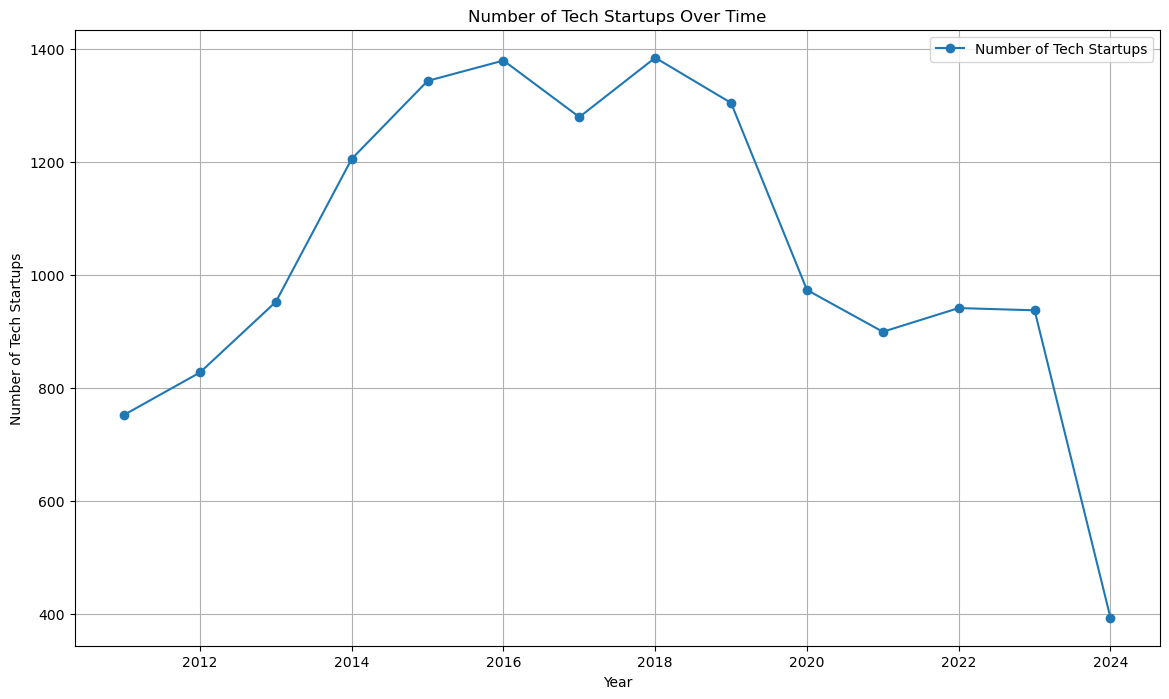

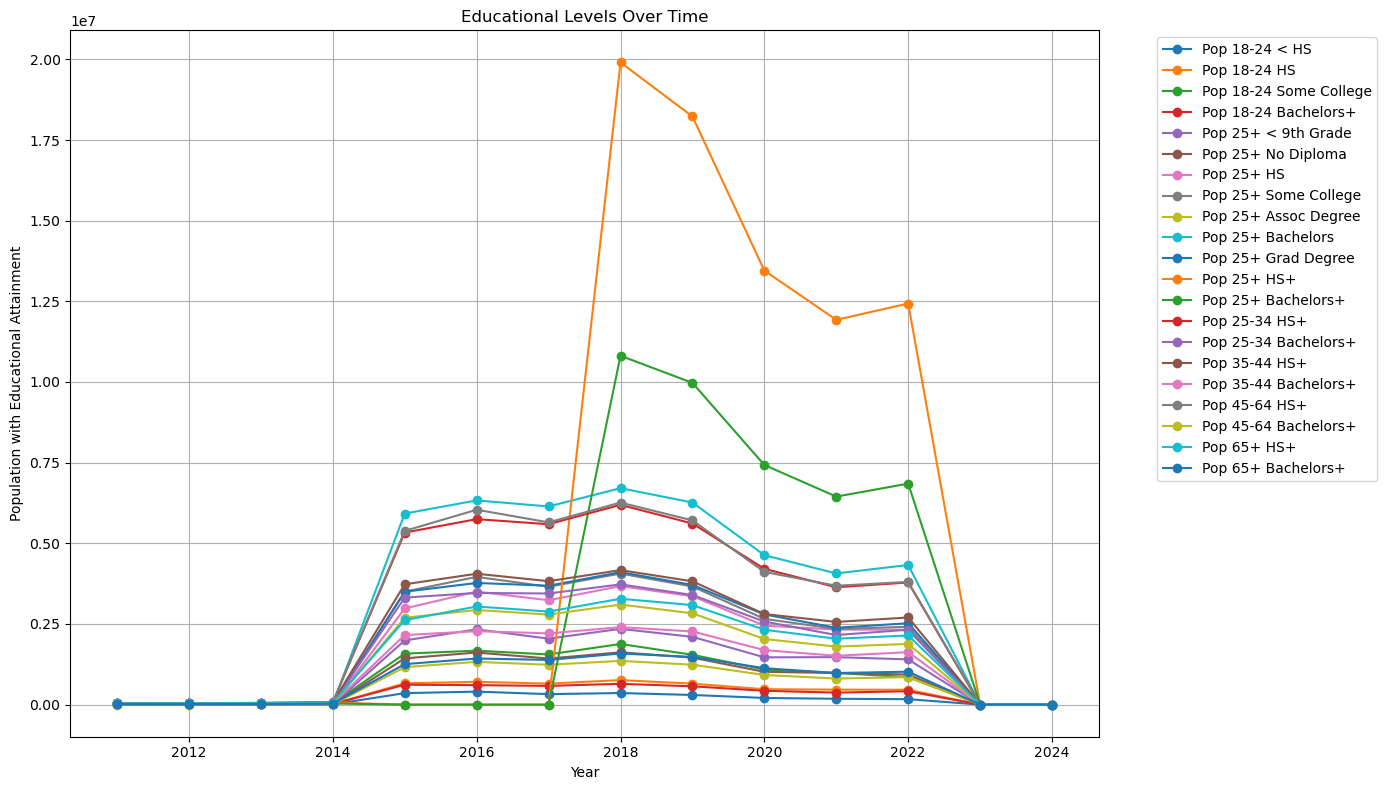

In [290]:
# Filter data for years after 2010
filtered_data = merged_analysis_data[merged_analysis_data['Year'] > 2010].copy()

# Create a column to count each business
filtered_data.loc[:, 'BusinessCount'] = 1

# Group by year and calculate the number of businesses and the sum of educational metrics
tech_startups_by_year = filtered_data.groupby('Year').agg({
    'BusinessCount': 'sum',  # Sum of tech startups per year
    'Pop 18-24 < HS': 'sum',
    'Pop 18-24 HS': 'sum',
    'Pop 18-24 Some College': 'sum',
    'Pop 18-24 Bachelors+': 'sum',
    'Pop 25+ < 9th Grade': 'sum',
    'Pop 25+ No Diploma': 'sum',
    'Pop 25+ HS': 'sum',
    'Pop 25+ Some College': 'sum',
    'Pop 25+ Assoc Degree': 'sum',
    'Pop 25+ Bachelors': 'sum',
    'Pop 25+ Grad Degree': 'sum',
    'Pop 25+ HS+': 'sum',
    'Pop 25+ Bachelors+': 'sum',
    'Pop 25-34 HS+': 'sum',
    'Pop 25-34 Bachelors+': 'sum',
    'Pop 35-44 HS+': 'sum',
    'Pop 35-44 Bachelors+': 'sum',
    'Pop 45-64 HS+': 'sum',
    'Pop 45-64 Bachelors+': 'sum',
    'Pop 65+ HS+': 'sum',
    'Pop 65+ Bachelors+': 'sum'
}).reset_index()

# Display the aggregated data
print(tech_startups_by_year)

# Plot the number of tech startups over time
plt.figure(figsize=(14, 8))
plt.plot(tech_startups_by_year['Year'], tech_startups_by_year['BusinessCount'], marker='o', label='Number of Tech Startups')
plt.title('Number of Tech Startups Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Tech Startups')
plt.grid(True)
plt.legend()
plt.show()

# Plot educational levels over time
education_levels = [
    'Pop 18-24 < HS', 'Pop 18-24 HS', 'Pop 18-24 Some College', 'Pop 18-24 Bachelors+',
    'Pop 25+ < 9th Grade', 'Pop 25+ No Diploma', 'Pop 25+ HS', 'Pop 25+ Some College',
    'Pop 25+ Assoc Degree', 'Pop 25+ Bachelors', 'Pop 25+ Grad Degree', 'Pop 25+ HS+',
    'Pop 25+ Bachelors+', 'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 'Pop 35-44 HS+',
    'Pop 35-44 Bachelors+', 'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 'Pop 65+ HS+',
    'Pop 65+ Bachelors+'
]

plt.figure(figsize=(14, 8))
for level in education_levels:
    if level in tech_startups_by_year.columns:
        y_values = tech_startups_by_year[level]
        plt.plot(tech_startups_by_year['Year'], y_values, marker='o', label=level)
    else:
        print(f"Column '{level}' does not exist in the data.")
plt.title('Educational Levels Over Time')
plt.xlabel('Year')
plt.ylabel('Population with Educational Attainment')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

It appears that education data <Year 2014 is not being pulled for analysis and I will correct this in pre-processing stage.

In [237]:
import pandas as pd

# Load the original education data
education_data = pd.read_csv('/Users/admin/Desktop/filtered_education_data.csv')

# Check the distribution of years
print(education_data['Year'].value_counts().sort_index())

# Verify the range of years in the dataset
print(f"Min Year: {education_data['Year'].min()}, Max Year: {education_data['Year'].max()}")


2011    171
2012    171
2013    171
2014    171
2015    108
2016    171
2017    171
2018    171
2019    171
2020    171
2021    173
2022    173
Name: Year, dtype: int64
Min Year: 2011, Max Year: 2022
